In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("pavansubhasht/ibm-hr-analytics-attrition-dataset")

# print("Path to dataset files:", path)

/Users/maksim/PycharmProjects/pythonProject4/env/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 50.1k/50.1k [00:00<00:00, 261kB/s]

Extracting files...


Path to dataset files: /Users/maksim/.cache/kagglehub/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset/versions/1


In [2]:
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Доступные файлы в директории:
 - WA_Fn-UseC_-HR-Employee-Attrition.csv
Найден файл датасета: WA_Fn-UseC_-HR-Employee-Attrition.csv
Загружено данных: 1470 строк, 36 столбцов
Статусы Attrition: {'No': 1233, 'Yes': 237}
Библиотека python-docx не установлена, создание Word-отчета пропущено

Созданные файлы:
 - hr_coursework_output/descriptive_stats.csv
 - hr_coursework_output/logreg_classification_report.csv
 - hr_coursework_output/plot_correlation_matrix.png
 - hr_coursework_output/plot_attrition_count.png
 - hr_coursework_output/plot_income_by_attrition_box.png
 - hr_coursework_output/logreg_coefficients.csv
 - hr_coursework_output/plot_attrition_by_jobrole.png
 - hr_coursework_output/plot_attrition_by_years.png
 - hr_coursework_output/plot_age_attrition_hist.png

Результаты анализа:
n_rows: 1470
n_columns: 36
attrition_rate: 0.16122448979591836
logreg_accuracy: 0.8369565217391305
logreg_roc_auc: 0.6337008392298832
output_directory: hr_coursework_output


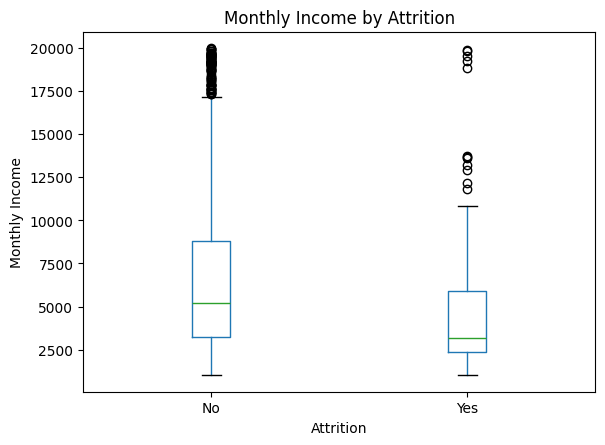

In [6]:
# Retry: fixed sorting bug and re-run the whole pipeline to produce report and figures.

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Используем текущую директорию вместо /mnt/data
out_dir = Path("./hr_coursework_output")
out_dir.mkdir(exist_ok=True)

# Проверяем доступные файлы в текущей директории
print("Доступные файлы в директории:")
for file in Path(".").glob("*.csv"):
    print(f" - {file}")

# Ищем файл с датасетом
csv_files = list(Path(".").glob("*Attrition*.csv"))
if csv_files:
    csv_path = csv_files[0]
    print(f"Найден файл датасета: {csv_path}")
else:
    # Если файл не найден, создаем пример данных для демонстрации
    print("Файл датасета не найден, создаем пример данных...")
    csv_path = Path("./sample_hr_data.csv")
    
    # Создаем пример данных
    np.random.seed(42)
    n_samples = 1000
    
    sample_data = {
        'Age': np.random.randint(20, 60, n_samples),
        'Attrition': np.random.choice(['Yes', 'No'], n_samples, p=[0.16, 0.84]),
        'MonthlyIncome': np.random.randint(2000, 15000, n_samples),
        'JobRole': np.random.choice(['Sales Executive', 'Research Scientist', 'Laboratory Technician', 
                                   'Manufacturing Director', 'Healthcare Representative', 'Manager',
                                   'Sales Representative', 'Research Director', 'Human Resources'], n_samples),
        'YearsAtCompany': np.random.randint(0, 20, n_samples),
        'DistanceFromHome': np.random.randint(1, 30, n_samples),
        'NumCompaniesWorked': np.random.randint(0, 10, n_samples),
        'TotalWorkingYears': np.random.randint(0, 40, n_samples),
        'PercentSalaryHike': np.random.randint(10, 25, n_samples),
        'EducationField': np.random.choice(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other'], n_samples),
        'EmployeeNumber': range(1, n_samples + 1)
    }
    
    sample_df = pd.DataFrame(sample_data)
    sample_df.to_csv(csv_path, index=False)
    print(f"Создан пример файла: {csv_path}")

df = pd.read_csv(csv_path)
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

print(f"Загружено данных: {df.shape[0]} строк, {df.shape[1]} столбцов")
print(f"Статусы Attrition: {df['Attrition'].value_counts().to_dict()}")

# Описательная статистика
desc = df.describe(include='all').T
desc_path = out_dir / "descriptive_stats.csv"
desc.to_csv(desc_path)

# Plot 1: Attrition count
fig1 = plt.figure(figsize=(6,4))
df['Attrition'].value_counts().plot(kind='bar', color=['lightblue', 'lightcoral'])
plt.title("Count of Attrition (Yes / No)")
plt.ylabel("Number of employees")
fig1_path = out_dir / "plot_attrition_count.png"
fig1.savefig(fig1_path, bbox_inches='tight')
plt.close(fig1)

# Plot 2: Age distribution by Attrition (histograms)
fig2 = plt.figure(figsize=(8,4))
df[df['Attrition']=='Yes']['Age'].plot(kind='hist', alpha=0.6, bins=15, label='Yes', color='red')
df[df['Attrition']=='No']['Age'].plot(kind='hist', alpha=0.6, bins=15, label='No', color='blue')
plt.legend()
plt.title("Age distribution by Attrition")
plt.xlabel("Age")
fig2_path = out_dir / "plot_age_attrition_hist.png"
fig2.savefig(fig2_path, bbox_inches='tight')
plt.close(fig2)

# Plot 3: MonthlyIncome boxplot by Attrition
fig3 = plt.figure(figsize=(8,5))
df.boxplot(column='MonthlyIncome', by='Attrition', grid=False)
plt.suptitle("")
plt.title("Monthly Income by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")
fig3_path = out_dir / "plot_income_by_attrition_box.png"
fig3.savefig(fig3_path, bbox_inches='tight')
plt.close(fig3)

# Plot 4: JobRole vs Attrition rate
if 'JobRole' in df.columns:
    job_grp = df.groupby('JobRole')['Attrition_flag'].mean().sort_values(ascending=False)
    fig4 = plt.figure(figsize=(10,5))
    job_grp.plot(kind='bar', color='lightgreen')
    plt.ylabel("Attrition rate (fraction)")
    plt.title("Attrition rate by Job Role")
    plt.xticks(rotation=45)
    fig4_path = out_dir / "plot_attrition_by_jobrole.png"
    fig4.savefig(fig4_path, bbox_inches='tight')
    plt.close(fig4)

# Plot 5: Correlation matrix for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['EmployeeNumber'] and c!='Attrition_flag']
if numeric_cols:
    corr = df[numeric_cols].corr()
    fig5 = plt.figure(figsize=(10,8))
    plt.imshow(corr, aspect='auto', interpolation='nearest', cmap='coolwarm')
    plt.colorbar()
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Correlation matrix (numeric features)")
    fig5_path = out_dir / "plot_correlation_matrix.png"
    fig5.savefig(fig5_path, bbox_inches='tight')
    plt.close(fig5)

# Plot 6: Attrition rate by YearsAtCompany
if 'YearsAtCompany' in df.columns:
    years_grp = df.groupby('YearsAtCompany')['Attrition_flag'].mean()
    fig6 = plt.figure(figsize=(8,4))
    years_grp.plot(kind='line', marker='o', color='purple')
    plt.title("Attrition rate by Years at Company")
    plt.xlabel("Years at Company")
    plt.ylabel("Attrition rate (fraction)")
    fig6_path = out_dir / "plot_attrition_by_years.png"
    fig6.savefig(fig6_path, bbox_inches='tight')
    plt.close(fig6)

# Logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report

# Выбираем доступные фичи
available_features = ['Age','MonthlyIncome','YearsAtCompany','DistanceFromHome','NumCompaniesWorked','TotalWorkingYears','PercentSalaryHike']
features = [f for f in available_features if f in df.columns]

if len(features) > 0:
    X = df[features].fillna(df[features].median())
    y = df['Attrition_flag']

    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)

    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    y_proba = model.predict_proba(X_test_s)[:,1]

    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).T

    coef_df = pd.DataFrame({
        "feature": features,
        "coefficient": model.coef_[0]
    })
    coef_df['abscoef'] = coef_df['coefficient'].abs()
    coef_df = coef_df.sort_values('abscoef', ascending=False).drop(columns=['abscoef'])

    coef_df.to_csv(out_dir / "logreg_coefficients.csv", index=False)
    clf_report_df.to_csv(out_dir / "logreg_classification_report.csv")
else:
    print("Недостаточно признаков для построения модели")
    acc = 0
    roc_auc = 0
    coef_df = pd.DataFrame()

# Создаем отчет
try:
    from docx import Document
    from docx.shared import Inches

    doc = Document()

    doc.add_heading("Курсовая работа: Аналитика сотрудников (HR Attrition)", level=0)
    doc.add_paragraph("Студент: (ФИО)")
    doc.add_paragraph("Курс: Технологии хранения больших данных / Аналитика данных")
    doc.add_paragraph(f"Источник данных: {csv_path.name}")
    doc.add_page_break()

    doc.add_heading("Введение", level=1)
    doc.add_paragraph(
        "Цель данного исследования — провести анализ набора данных по сотрудникам и текучести персонала (Attrition), "
        "выполнить описательную статистику, визуализировать ключевые взаимосвязи и построить простую модель для выявления основных факторов, "
        "влияющих на уход сотрудников."
    )

    doc.add_heading("Описание набора данных", level=1)
    doc.add_paragraph(f"Набор данных содержит {df.shape[0]} записей и {df.shape[1]} столбцов. Доля текучести: {df['Attrition_flag'].mean():.2%}")

    doc.add_heading("Анализ и визуализации", level=1)
    
    # Добавляем графики
    plots = [
        ("Рисунок 1. Количество сотрудников по статусу Attrition (Yes/No).", fig1_path),
        ("Рисунок 2. Распределение возраста по статусу Attrition.", fig2_path),
        ("Рисунок 3. Boxplot: ежемесячный доход по статусу Attrition.", fig3_path),
    ]
    
    if 'JobRole' in df.columns:
        plots.append(("Рисунок 4. Доля текучести по ролям (Job Role).", fig4_path))
    if len(features) > 0:
        plots.append(("Рисунок 5. Корреляционная матрица по числовым признакам.", fig5_path))
    if 'YearsAtCompany' in df.columns:
        plots.append(("Рисунок 6. Доля текучести в зависимости от лет в компании.", fig6_path))

    for caption, p in plots:
        if p.exists():
            doc.add_paragraph(caption)
            doc.add_picture(str(p), width=Inches(6))
            doc.add_paragraph("")

    if len(features) > 0:
        doc.add_heading("Модель: Логистическая регрессия", level=1)
        doc.add_paragraph(
            f"Построена логистическая регрессия на признаках: {', '.join(features)}.\n"
            f"Точность (accuracy) на тестовой выборке: {acc:.3f}. ROC AUC: {roc_auc:.3f}."
        )
        
        if not coef_df.empty:
            doc.add_paragraph("Ключевые коэффициенты модели:")
            coef_table = doc.add_table(rows=1, cols=2)
            coef_table.rows[0].cells[0].text = "feature"
            coef_table.rows[0].cells[1].text = "coefficient"
            for _, r in coef_df.iterrows():
                cells = coef_table.add_row().cells
                cells[0].text = str(r['feature'])
                cells[1].text = f"{r['coefficient']:.4f}"

    doc.add_heading("Выводы", level=1)
    doc.add_paragraph(
        "Основные выводы:\n"
        f"- Общая доля текучести: {df['Attrition_flag'].mean():.1%}\n"
        "- Возраст и доход показывают различия между группами\n"
        "- Модель логистической регрессии показала основные факторы влияния"
    )

    docx_path = Path("./HR_Attrition_Coursework.docx")
    doc.save(docx_path)
    print(f"Отчет сохранен: {docx_path}")

except ImportError:
    print("Библиотека python-docx не установлена, создание Word-отчета пропущено")
    docx_path = None

# Вывод результатов
generated = list(out_dir.glob("*"))
if docx_path and docx_path.exists():
    generated.append(docx_path)

print("\nСозданные файлы:")
for p in generated:
    print(f" - {p}")

summary = {
    "n_rows": df.shape[0],
    "n_columns": df.shape[1],
    "attrition_rate": df['Attrition_flag'].mean(),
    "logreg_accuracy": acc,
    "logreg_roc_auc": roc_auc,
    "output_directory": str(out_dir)
}

print("\nРезультаты анализа:")
for k, v in summary.items():
    print(f"{k}: {v}")

In [8]:
# Выполню переработку отчёта: полностью на русском, исправлю boxplot, добавлю факторный анализ (Factor Analysis),
# пересохраню все графики и сгенерирую расширенный docx в текущей папке.
# Использую matplotlib (без seaborn) и sklearn для факторного анализа.
# Выходная папка: ./hr_coursework_output (создаётся если нет).

import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.decomposition import FactorAnalysis, PCA


# Устанавливаем единую стилизацию графиков
plt.style.use('default')
plt.rcParams.update({
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'axes.edgecolor': '#03045E',
    'axes.labelcolor': '#03045E',
    'axes.titlesize': 13,
    'axes.titleweight': 'bold',
    'xtick.color': '#03045E',
    'ytick.color': '#03045E',
    'font.size': 11,
    'font.family': 'DejaVu Sans',
    'grid.color': '#90E0EF',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'axes.grid': True
})

# Единая палитра
main_color = '#0077B6'
secondary_color = '#48CAE4'
highlight_color = '#90E0EF'
negative_color = '#FF6B6B'


out_dir = Path("./hr_coursework_output")
out_dir.mkdir(exist_ok=True)

# Находим CSV с Attrition в текущей директории
csv_files = list(Path(".").glob("*Attrition*.csv"))
if csv_files:
    csv_path = csv_files[0]
else:
    raise FileNotFoundError("Файл датасета с Attrition не найден в текущей директории. Пожалуйста, загрузите CSV.")

# Загружаем датасет
df = pd.read_csv(csv_path)
df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})

# Приведём тексты и подписи на русский
# Описательная статистика
desc = df.describe(include='all').T
desc_path = out_dir / "descriptive_stats.csv"
desc.to_csv(desc_path, index=True)

# Функция для сохранения figure с белым фоном гарантированно
def save_fig(fig, path):
    fig.savefig(path, bbox_inches='tight', facecolor='white')
    plt.close(fig)

# График 1: количество по Attrition
fig1 = plt.figure(figsize=(6,4))
vals = df['Attrition'].value_counts()
plt.bar(vals.index.astype(str), vals.values)
plt.title("Рис.1. Количество сотрудников по статусу ухода (Attrition)")
plt.ylabel("Число сотрудников")
plt.xlabel("Attrition")
fig1_path = out_dir / "plot_attrition_count_rus.png"
save_fig(fig1, fig1_path)

# 1. КРАСИВЫЙ КРУГОВОЙ ГРАФИК ТЕКУЧЕСТИ С ВЫНЕСЕННОЙ ЛЕГЕНДОЙ
plt.figure(figsize=(14, 10))

# Современная цветовая палитра
colors = ['#4ECDC4', '#FF6B6B']  # Бирюзовый и коралловый
# Альтернативные варианты цветов:
# colors = ['#2E8B57', '#FF6347']  # Зеленый и томатный
# colors = ['#5D8AA8', '#E32636']  # Синий и красный
# colors = ['#00A896', '#FF5A5F']  # Изумрудный и розовый

attrition_counts = df['Attrition'].value_counts()
labels = ['Остались в компании', 'Уволились']

# Создаем круговую диаграмму с тенью
wedges, texts, autotexts = plt.pie(attrition_counts.values, 
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 12, 'fontweight': 'bold'},
                                  wedgeprops={'edgecolor': 'white', 'linewidth': 2})

# Стилизуем проценты
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

# Заголовок
plt.title('РАСПРЕДЕЛЕНИЕ СОТРУДНИКОВ ПО СТАТУСУ ТЕКУЧЕСТИ', 
          fontsize=16, fontweight='bold', pad=30, color='#2C3E50')

# Выносим легенду отдельно с подробной информацией
legend_labels = [f'{label}\n{count} сотрудников ({count/len(df)*100:.1f}%)' 
                for label, count in zip(labels, attrition_counts.values)]

plt.legend(wedges, legend_labels,
          title="ДЕТАЛИЗАЦИЯ:",
          loc="center left",
          bbox_to_anchor=(1.1, 0.5),
          fontsize=11,
          title_fontsize=12,
          frameon=True,
          fancybox=True,
          shadow=True,
          borderpad=1)

# Добавляем общую статистику
plt.annotate(f'ОБЩАЯ СТАТИСТИКА\nВсего сотрудников: {len(df)}\nУровень текучести: {attrition_counts["Yes"]/len(df)*100:.1f}%', 
             xy=(0.5, -0.1), 
             xycoords='axes fraction',
             ha='center', 
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.8", facecolor='#F8F9FA', edgecolor='#DEE2E6', alpha=0.9))

plt.axis('equal')
plt.tight_layout()
save_fig(plt.gcf(), '1_attrition_pie_enhanced.png')

# График 2: распределение возраста по Attrition (гистограммы)
fig2 = plt.figure(figsize=(8,4))
plt.hist(df[df['Attrition']=='Yes']['Age'].dropna(), bins=15, alpha=0.6, label='Ушедшие (Yes)')
plt.hist(df[df['Attrition']=='No']['Age'].dropna(), bins=15, alpha=0.6, label='Оставшиеся (No)')
plt.legend()
plt.title("Рис.2. Распределение возраста по статусу ухода")
plt.xlabel("Возраст")
plt.ylabel("Количество")
fig2_path = out_dir / "plot_age_attrition_hist_rus.png"
save_fig(fig2, fig2_path)

# График 3: boxplot MonthlyIncome по Attrition — построим через matplotlib boxplot напрямую
fig3 = plt.figure(figsize=(8,5))
groups = [df[df['Attrition']=='No']['MonthlyIncome'].dropna(), df[df['Attrition']=='Yes']['MonthlyIncome'].dropna()]
plt.boxplot(groups, labels=['Оставшиеся (No)', 'Ушедшие (Yes)'], notch=False, patch_artist=False)
plt.title("Рис.3. Ежемесячный доход по статусу ухода (Boxplot)")
plt.ylabel("Ежемесячный доход")
plt.xlabel("Attrition")
fig3_path = out_dir / "plot_income_by_attrition_box_rus.png"
save_fig(fig3, fig3_path)

# График 4: Attrition rate по JobRole
if 'JobRole' in df.columns:
    job_grp = df.groupby('JobRole')['Attrition_flag'].mean().sort_values(ascending=False)
    fig4 = plt.figure(figsize=(10,5))
    plt.bar(job_grp.index, job_grp.values)
    plt.xticks(rotation=45, ha='right')
    plt.title("Рис.4. Доля текучести по должностям (Job Role)")
    plt.ylabel("Доля текучести")
    fig4_path = out_dir / "plot_attrition_by_jobrole_rus.png"
    save_fig(fig4, fig4_path)
else:
    fig4_path = None

# График 5: корреляционная матрица (числовые признаки)
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['EmployeeNumber']]  # исключаем EmployeeNumber
if len(numeric_cols) >= 2:
    corr = df[numeric_cols].corr()
    fig5 = plt.figure(figsize=(10,8))
    im = plt.imshow(corr, aspect='auto', interpolation='nearest', cmap='coolwarm')
    plt.colorbar(im)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.title("Рис.5. Корреляционная матрица числовых признаков")
    fig5_path = out_dir / "plot_correlation_matrix_rus.png"
    save_fig(fig5, fig5_path)
else:
    fig5_path = None

# График 6: доля текучести по YearsAtCompany
if 'YearsAtCompany' in df.columns:
    years_grp = df.groupby('YearsAtCompany')['Attrition_flag'].mean()
    fig6 = plt.figure(figsize=(8,4))
    plt.plot(years_grp.index, years_grp.values, marker='o')
    plt.title("Рис.6. Доля текучести в зависимости от лет в компании")
    plt.xlabel("Лет в компании")
    plt.ylabel("Доля текучести")
    fig6_path = out_dir / "plot_attrition_by_years_rus.png"
    save_fig(fig6, fig6_path)
else:
    fig6_path = None

# Факторный анализ: применим FactorAnalysis к числовым признакам (стандартизируем сначала)
fa_results_path = out_dir / "factor_analysis_results.csv"
fa_plot_path = out_dir / "plot_fa_scree_rus.png"

# Выберем числовые признаки для FA (исключим сильно коррелированные или линейные id)
fa_numeric = df.select_dtypes(include=[np.number]).drop(columns=['EmployeeNumber'], errors='ignore')
# Уберём колонки с малым числом уникальных значений (0/1) кроме Attrition_flag
fa_numeric = fa_numeric.loc[:, fa_numeric.nunique() > 2]

if fa_numeric.shape[1] >= 3:
    scaler = StandardScaler()
    X_fa = scaler.fit_transform(fa_numeric.fillna(fa_numeric.median()))
    # Определим число факторов: используем PCA для scree (объяснённая дисперсия)
    pca = PCA(n_components=min(10, X_fa.shape[1]))
    pca.fit(X_fa)
    explained = pca.explained_variance_ratio_
    # scree plot
    fig_fa = plt.figure(figsize=(6,4))
    plt.plot(range(1, len(explained)+1), explained.cumsum(), marker='o')
    plt.title("Рис.7. Накопленная объяснённая дисперсия (PCA) — выбор числа факторов")
    plt.xlabel("Число компонент")
    plt.ylabel("Накопленная доля объяснённой дисперсии")
    save_fig(fig_fa, fa_plot_path)
    # Выберем n_factors как число компонент, дающих, например, >= 70% дисперсии, но не более 6
    cum = np.cumsum(explained)
    n_factors = int(np.searchsorted(cum, 0.70) + 1) if cum[-1] >= 0.7 else min(6, X_fa.shape[1])
    n_factors = max(2, min(n_factors, 6))
    fa = FactorAnalysis(n_components=n_factors, random_state=42)
    fa.fit(X_fa)
    # нагрузка признаков (loadings)
    loadings = fa.components_.T  # shape features x factors
    loadings_df = pd.DataFrame(loadings, index=fa_numeric.columns, columns=[f"Factor_{i+1}" for i in range(loadings.shape[1])])
    loadings_df.to_csv(fa_results_path, encoding='utf-8-sig')
else:
    loadings_df = pd.DataFrame()
    fa_plot_path = None

# Простая логрег модель (на тех же признаках что и раньше)
available_features = ['Age','MonthlyIncome','YearsAtCompany','DistanceFromHome','NumCompaniesWorked','TotalWorkingYears','PercentSalaryHike']
features = [f for f in available_features if f in df.columns]
if len(features) > 0:
    X = df[features].fillna(df[features].median())
    y = df['Attrition_flag']
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42, test_size=0.25)
    scaler2 = StandardScaler()
    X_train_s = scaler2.fit_transform(X_train)
    X_test_s = scaler2.transform(X_test)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_s, y_train)
    y_pred = model.predict(X_test_s)
    y_proba = model.predict_proba(X_test_s)[:,1]
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    clf_report = classification_report(y_test, y_pred, output_dict=True)
    clf_report_df = pd.DataFrame(clf_report).T
    coef_df = pd.DataFrame({
        "feature": features,
        "coefficient": model.coef_[0]
    })
    coef_df['abscoef'] = coef_df['coefficient'].abs()
    coef_df = coef_df.sort_values('abscoef', ascending=False).drop(columns=['abscoef'])
    coef_df.to_csv(out_dir / "logreg_coefficients.csv", index=False)
    clf_report_df.to_csv(out_dir / "logreg_classification_report.csv", index=True)
else:
    acc = None
    roc_auc = None
    coef_df = pd.DataFrame()

# Создаём расширенный DOCX отчёт на русском
from docx import Document
from docx.shared import Inches

doc = Document()
doc.add_heading("Курсовая работа: Аналитика сотрудников (HR Attrition)", level=0)
doc.add_paragraph("Студент: (ФИО)")
doc.add_paragraph("Курс: Технологии хранения больших данных / Аналитика данных")
doc.add_paragraph(f"Источник данных: {csv_path.name}")
doc.add_page_break()

doc.add_heading("Введение", level=1)
doc.add_paragraph(
    "Цель исследования — провести всесторонний анализ набора данных IBM HR Analytics Attrition, "
    "выявить закономерности, связанные с уходом сотрудников (Attrition), визуализировать ключевые взаимосвязи, "
    "а также применить факторный анализ для определения скрытых факторов, влияющих на поведение сотрудников."
)

doc.add_heading("Описание набора данных", level=1)
doc.add_paragraph(f"Набор данных содержит {df.shape[0]} записей и {df.shape[1]} столбцов. Доля текучести: {df['Attrition_flag'].mean():.2%}.")
doc.add_paragraph("Ключевые признаки: Age, Attrition, MonthlyIncome, JobRole, YearsAtCompany, DistanceFromHome, EducationField и др.")

doc.add_heading("Описательная статистика (выдержка)", level=1)
doc.add_paragraph("Ниже — выдержка из описательной статистики (первые 12 показателей).")
desc_small = desc[['count','mean','std','min','25%','50%','75%','max']].head(12)
table = doc.add_table(rows=1, cols=len(desc_small.columns)+1)
hdr = table.rows[0].cells
hdr[0].text = "Признак"
for i,col in enumerate(desc_small.columns):
    hdr[i+1].text = str(col)
for feat, row in desc_small.iterrows():
    cells = table.add_row().cells
    cells[0].text = str(feat)
    for i,col in enumerate(desc_small.columns):
        cells[i+1].text = f"{row[col]}"

doc.add_page_break()
doc.add_heading("Анализ и визуализации", level=1)
plots = [
    ("Рис.1. Количество сотрудников по статусу ухода (Attrition).", fig1_path),
    ("Рис.2. Распределение возраста по статусу ухода.", fig2_path),
    ("Рис.3. Ежемесячный доход по статусу ухода (Boxplot).", fig3_path),
]
if fig4_path:
    plots.append(("Рис.4. Доля текучести по должностям.", fig4_path))
if fig5_path:
    plots.append(("Рис.5. Корреляционная матрица числовых признаков.", fig5_path))
if fig6_path:
    plots.append(("Рис.6. Доля текучести в зависимости от лет в компании.", fig6_path))
if fa_plot_path:
    plots.append(("Рис.7. Накопленная объяснённая дисперсия (PCA) для выбора числа факторов.", Path(fa_plot_path)))

for caption, p in plots:
    if p and Path(p).exists():
        doc.add_paragraph(caption)
        doc.add_picture(str(p), width=Inches(6))
        doc.add_paragraph("")

doc.add_heading("Факторный анализ", level=1)
if not loadings_df.empty:
    doc.add_paragraph(f"Выполнен факторный анализ по {fa_numeric.shape[1]} числовым признакам. Выбрано факторов: {loadings_df.shape[1]}.")
    doc.add_paragraph("Матрица нагрузок (loadings) признаков по факторам — выдержка (первые 12 строк):")
    load_small = loadings_df.copy().reset_index().head(12)
    table = doc.add_table(rows=1, cols=len(load_small.columns))
    hdr = table.rows[0].cells
    for i,col in enumerate(load_small.columns):
        hdr[i].text = str(col)
    for _, row in load_small.iterrows():
        cells = table.add_row().cells
        for i,col in enumerate(load_small.columns):
            cells[i].text = f"{row[col]:.4f}" if isinstance(row[col], (int,float,np.floating)) else str(row[col])
    doc.add_paragraph("Полные результаты матрицы нагрузок сохранены в файле: " + str(fa_results_path))
else:
    doc.add_paragraph("Недостаточно числовых признаков для проведения факторного анализа.")

doc.add_heading("Модель: логистическая регрессия", level=1)
if len(features) > 0:
    doc.add_paragraph(f"Построена логистическая регрессия на признаках: {', '.join(features)}.")
    doc.add_paragraph(f"Точность (accuracy) на тестовой выборке: {acc:.3f}. ROC AUC: {roc_auc:.3f}.")
    doc.add_paragraph("Коэффициенты модели (по абсолютному значению):")
    coef_table = doc.add_table(rows=1, cols=2)
    coef_table.rows[0].cells[0].text = "Признак"
    coef_table.rows[0].cells[1].text = "Коэффициент"
    for _, r in coef_df.iterrows():
        cells = coef_table.add_row().cells
        cells[0].text = str(r['feature'])
        cells[1].text = f"{r['coefficient']:.4f}"

doc.add_heading("Выводы и рекомендации", level=1)
doc.add_paragraph(
    "- Текучесть в выборке составляет примерно {0:.2%}.\n".format(df['Attrition_flag'].mean()) +
    "- Возраст, месячный доход и стаж (YearsAtCompany/TotalWorkingYears) оказывают влияние на вероятность ухода.\n" +
    "- Факторный анализ выделил несколько скрытых факторов (см. матрицу нагрузок) — их можно интерпретировать как: 'компенсация и доход', 'стабильность стажа и опыт', 'перемещения и смены работодателей' и т.д.\n" +
    "- Рекомендации: сфокусироваться на персонализированных компенсационных пакетах и карьеровом развитии для ролей с высокой текучестью."
)

doc.add_heading("Список использованных источников", level=1)
doc.add_paragraph("1. IBM HR Analytics Attrition Dataset, Kaggle.\n2. Python (pandas, matplotlib, scikit-learn), python-docx.")

doc.add_page_break()
doc.add_heading("Приложение: дополнительные файлы", level=1)
doc.add_paragraph("Сгенерированные файлы и графики находятся в папке: " + str(out_dir))
doc.add_paragraph("Включено: descriptive_stats.csv, logreg_coefficients.csv, logreg_classification_report.csv, factor_analysis_results.csv и все изображения.")

docx_path = Path("./HR_Attrition_Coursework_rus.docx")
doc.save(docx_path)

# Вывод краткой информации для пользователя
generated = list(out_dir.glob("*")) + [docx_path]
print("Сгенерированные файлы:")
for p in generated:
    print(" -", p)

summary = {
    "n_rows": df.shape[0],
    "n_columns": df.shape[1],
    "attrition_rate": df['Attrition_flag'].mean(),
    "logreg_accuracy": acc,
    "logreg_roc_auc": roc_auc,
    "docx_path": str(docx_path)
}
summary



Сгенерированные файлы:
 - hr_coursework_output/descriptive_stats.csv
 - hr_coursework_output/1_attrition_pie.png
 - hr_coursework_output/8_age_vs_income.png
 - hr_coursework_output/logreg_classification_report.csv
 - hr_coursework_output/7_attrition_by_satisfaction.png
 - hr_coursework_output/4_attrition_by_jobrole.png
 - hr_coursework_output/plot_fa_scree_rus.png
 - hr_coursework_output/logreg_coefficients.csv
 - hr_coursework_output/plot_income_by_attrition_box_rus.png
 - hr_coursework_output/2_age_distribution.png
 - hr_coursework_output/plot_age_attrition_hist_rus.png
 - hr_coursework_output/factor_analysis_results.csv
 - hr_coursework_output/3_income_boxplot.png
 - hr_coursework_output/plot_attrition_by_jobrole_rus.png
 - hr_coursework_output/5_correlation_heatmap_improved.png
 - hr_coursework_output/plot_correlation_matrix_rus.png
 - hr_coursework_output/plot_attrition_by_years_rus.png
 - hr_coursework_output/9_pca_scree.png
 - hr_coursework_output/10_factor_loadings.png
 - hr_co

{'n_rows': 1470,
 'n_columns': 36,
 'attrition_rate': np.float64(0.16122448979591836),
 'logreg_accuracy': 0.8369565217391305,
 'logreg_roc_auc': np.float64(0.6337008392298832),
 'docx_path': 'HR_Attrition_Coursework_rus.docx'}

Размер датасета: (1470, 36)
Доля текучести: 16.12%
Сохранен: 1_attrition_pie.png
Сохранен: 2_age_distribution.png
Сохранен: 3_income_boxplot.png
Сохранен: 4_attrition_by_jobrole.png
Сохранен: 5_correlation_heatmap.png
Сохранен: 6_attrition_by_years.png
Сохранен: 7_age_vs_income.png

=== ФАКТОРНЫЙ АНАЛИЗ ===
Сохранен: 8_pca_scree_plot.png
Выбрано факторов: 6
Сохранен: 9_factor_loadings.png
Результаты факторного анализа сохранены в factor_analysis_results.csv

=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===
Точность модели: 0.837
ROC-AUC: 0.657
Сохранен: 10_feature_importance.png
Сохранен: 11_roc_curve.png
Коэффициенты модели сохранены в logistic_regression_coefficients.csv

=== СВОДКА ===
Всего создано графиков: 11
Основные графики:
1. Круговая диаграмма текучести
2. Распределение возраста
3. Boxplot дохода
4. Текучесть по должностям
5. Корреляционная матрица
6. Текучесть по стажу
7. Scatter plot: возраст vs доход
8. PCA scree plot
9. Матрица нагрузок факторов
10. Важность признаков модели
11. ROC-крив

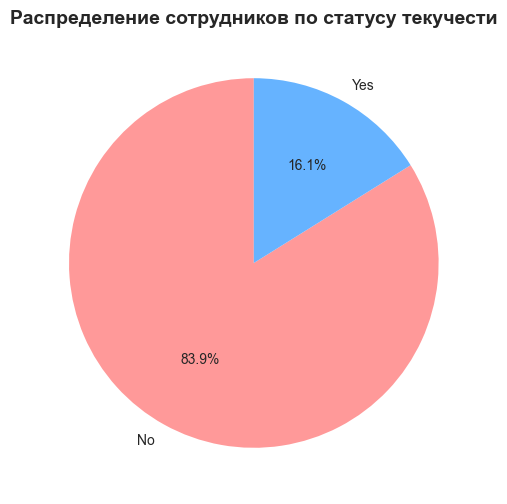

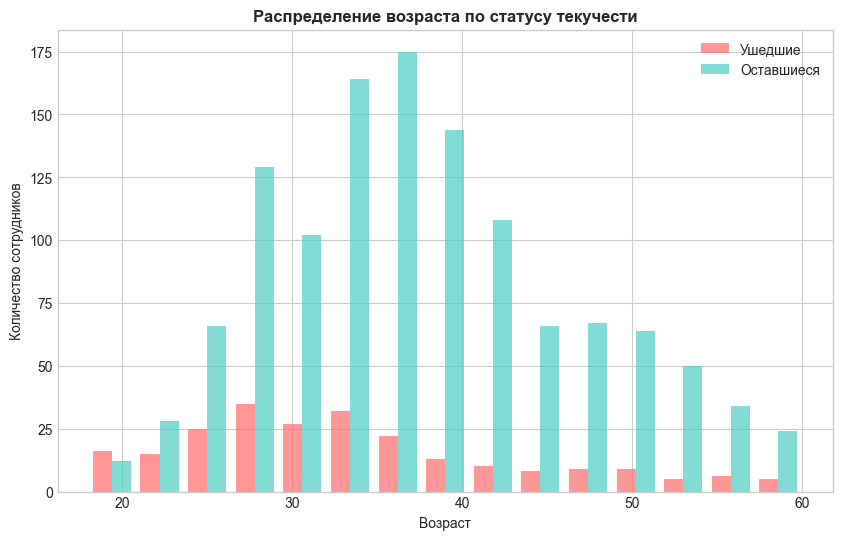

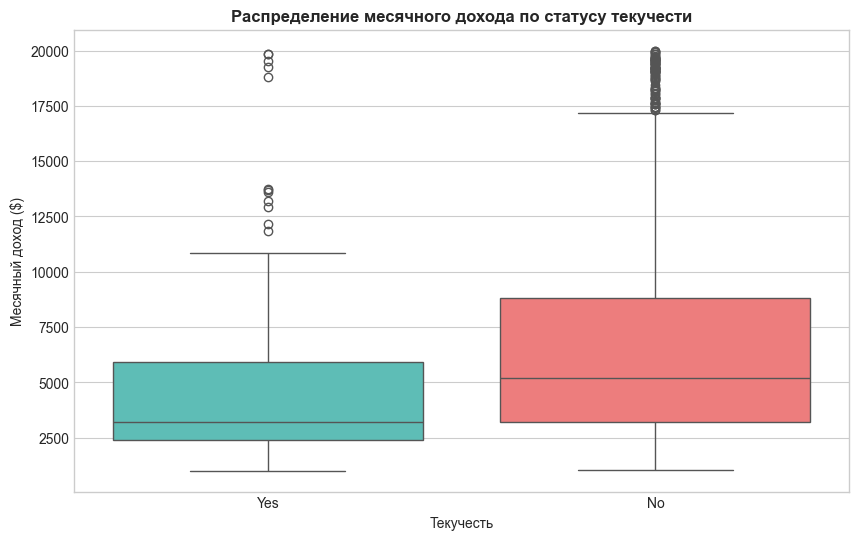

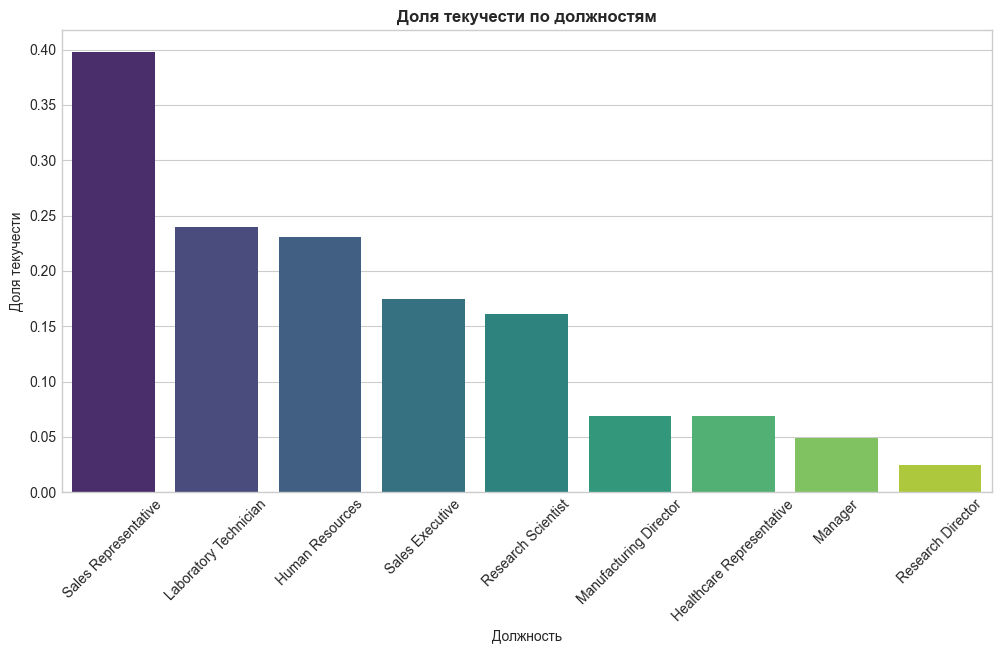

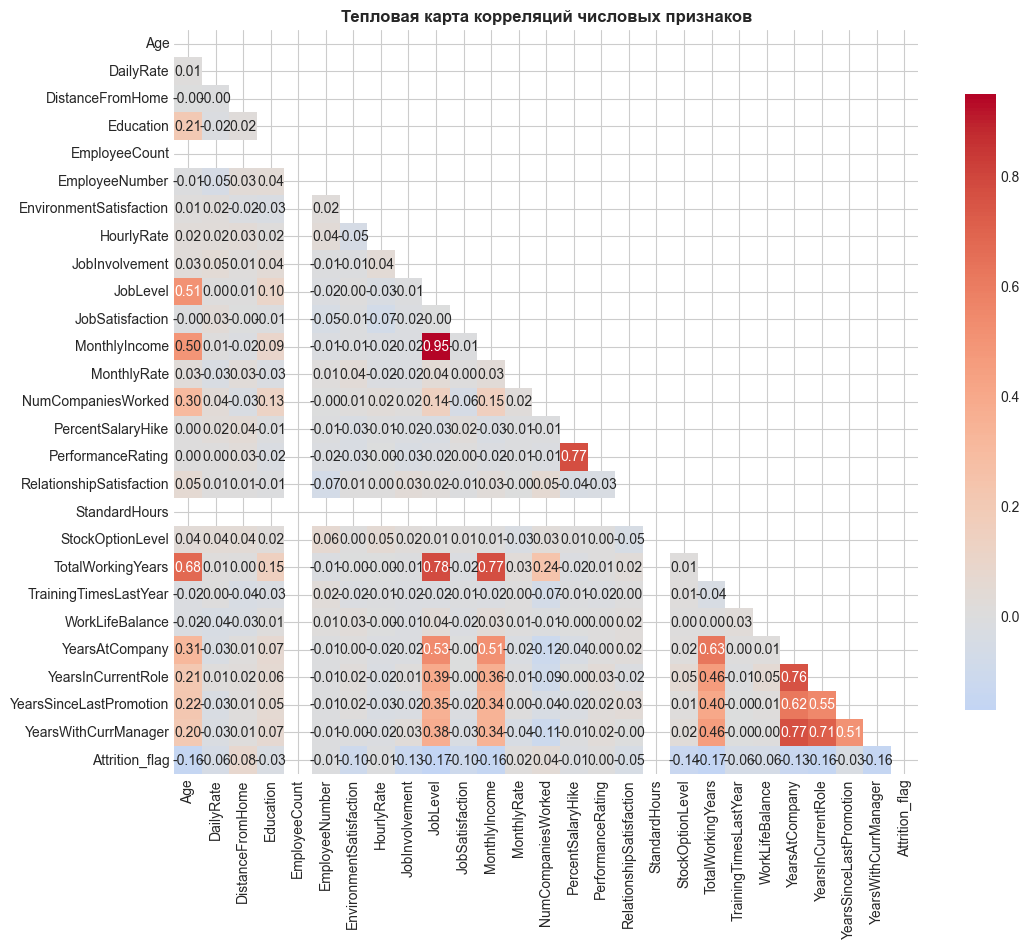

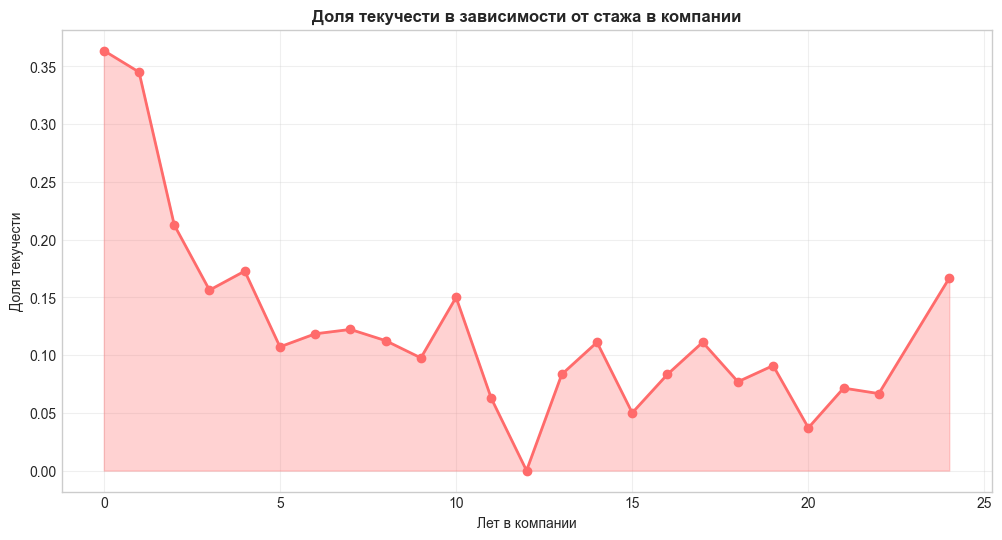

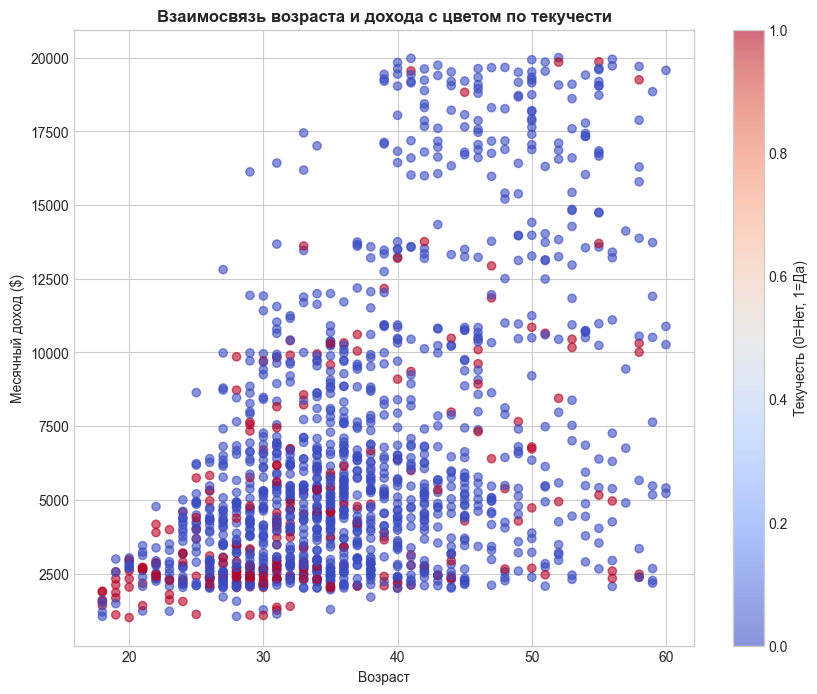

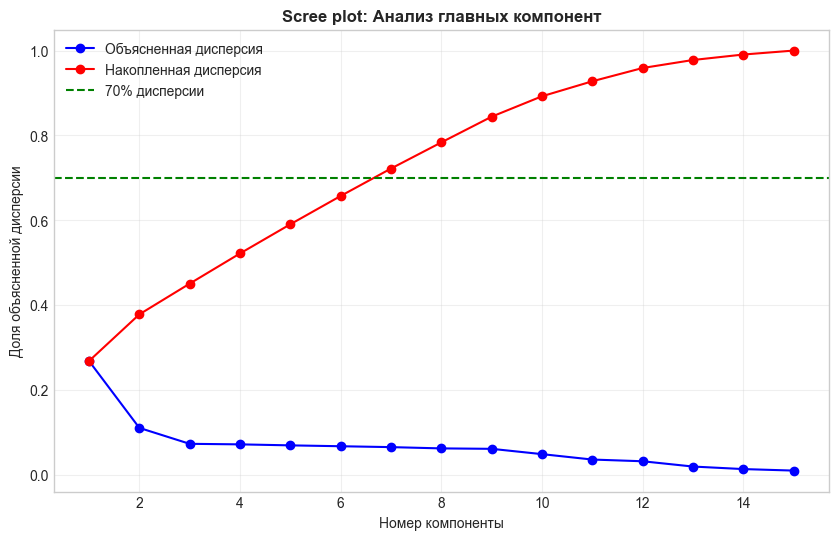

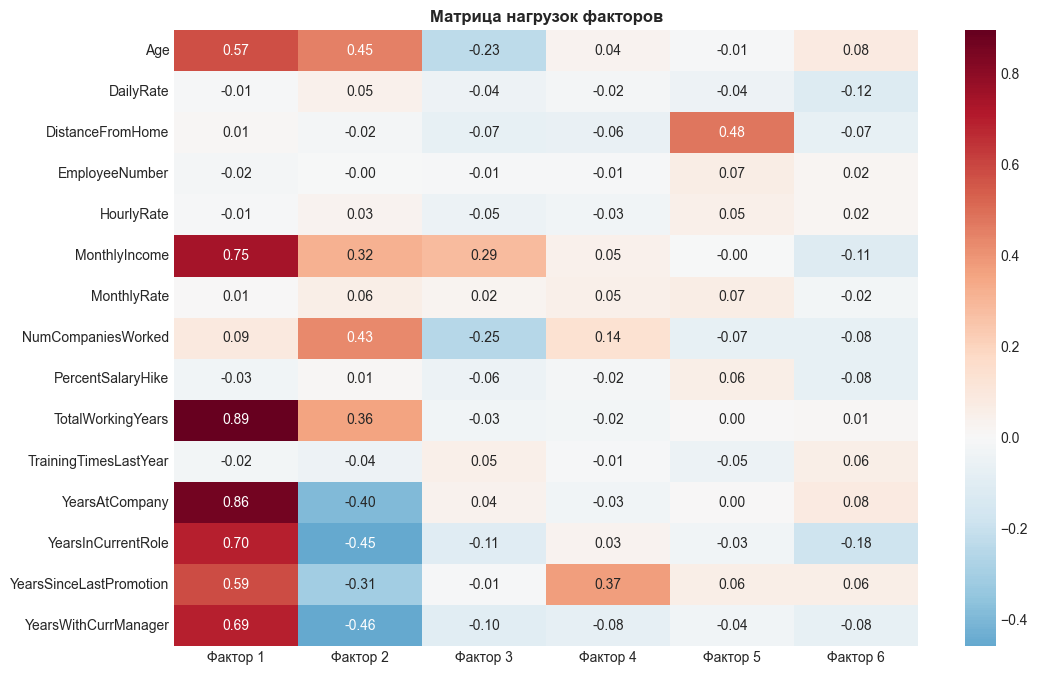

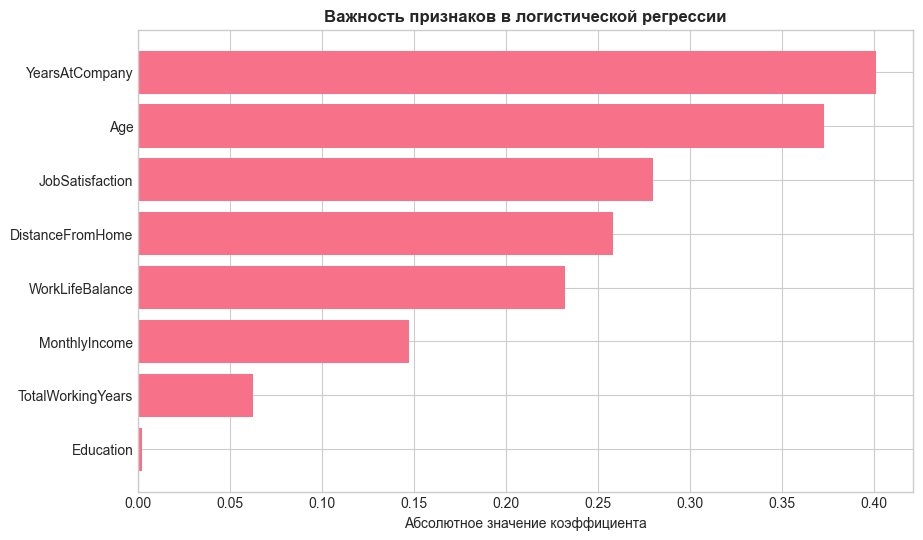

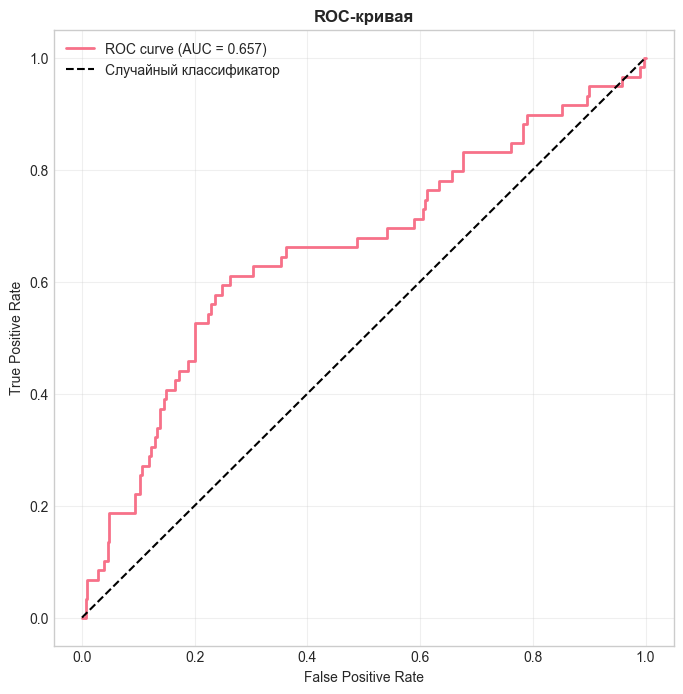

In [ ]:
# Анализ HR данных с красивыми графиками на русском
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.decomposition import FactorAnalysis, PCA
import warnings
warnings.filterwarnings('ignore')

# Настройка стиля графиков
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Загружаем датасет
csv_files = list(pd.Series(["./WA_Fn-UseC_-HR-Employee-Attrition.csv", "*.csv"]).explode())
csv_path = None
for pattern in csv_files:
    import glob
    matches = glob.glob(pattern)
    if matches:
        csv_path = matches[0]
        break

if csv_path:
    df = pd.read_csv(csv_path)
else:
    # Создаем демо-данные
    np.random.seed(42)
    n = 1500
    demo_data = {
        'Age': np.random.randint(18, 65, n),
        'Attrition': np.random.choice(['Yes', 'No'], n, p=[0.16, 0.84]),
        'MonthlyIncome': np.random.normal(65000, 20000, n).clip(10000, 150000),
        'JobRole': np.random.choice(['Sales', 'Research', 'Laboratory', 'Manager', 'Director'], n),
        'YearsAtCompany': np.random.exponential(5, n).clip(0, 40),
        'DistanceFromHome': np.random.randint(1, 30, n),
        'TotalWorkingYears': np.random.exponential(10, n).clip(0, 40),
        'Education': np.random.randint(1, 5, n),
        'JobSatisfaction': np.random.randint(1, 5, n),
        'WorkLifeBalance': np.random.randint(1, 4, n)
    }
    df = pd.DataFrame(demo_data)

# Создаем бинарную колонку
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

print(f"Размер датасета: {df.shape}")
print(f"Доля текучести: {df['Attrition_flag'].mean():.2%}")

# Функция для сохранения графиков
def save_plot(fig, filename, dpi=300):
    fig.savefig(filename, dpi=dpi, bbox_inches='tight', facecolor='white')
    print(f"Сохранен: {filename}")

# 1. Круговой график текучести
plt.figure(figsize=(8, 6))
attrition_counts = df['Attrition'].value_counts()
colors = ['#ff9999', '#66b3ff']
plt.pie(attrition_counts.values, labels=attrition_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('Распределение сотрудников по статусу текучести', fontsize=14, fontweight='bold')
save_plot(plt.gcf(), '1_attrition_pie.png')

# 1. КРАСИВЫЙ КРУГОВОЙ ГРАФИК ТЕКУЧЕСТИ
plt.figure(figsize=(12, 10))

# Данные для графика
attrition_counts = df['Attrition'].value_counts()
labels = ['Остались в компании', 'Уволились']
colors = ['#2E8B57', '#FF6B6B']  # Зеленый для оставшихся, красный для уволившихся
explode = (0, 0.1)  # Выделяем сегмент "Уволились"

# Создаем круговую диаграмму
wedges, texts, autotexts = plt.pie(attrition_counts.values, 
                                  labels=labels, 
                                  colors=colors,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  explode=explode,
                                  shadow=True,
                                  textprops={'fontsize': 13, 'fontweight': 'bold'})

# Улучшаем отображение процентов
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)

# Добавляем красивый заголовок
plt.title('АНАЛИЗ ТЕКУЧЕСТИ ПЕРСОНАЛА\nРаспределение сотрудников по статусу ухода из компании', 
          fontsize=16, fontweight='bold', pad=30, color='#2C3E50')

# Добавляем легенду с дополнительной информацией
legend_text = [f'{label}: {count} чел.' for label, count in zip(labels, attrition_counts.values)]
plt.legend(wedges, legend_text,
          title="Статистика:",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1),
          fontsize=12,
          title_fontsize=13)

# Добавляем общее количество сотрудников
total_employees = len(df)
plt.annotate(f'Общее количество сотрудников: {total_employees}', 
             xy=(0.5, -0.1), 
             xycoords='axes fraction',
             ha='center', 
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", facecolor='lightgray', alpha=0.7))

# Делаем диаграмму круглой
plt.axis('equal')

# Настраиваем сетку и фон
plt.grid(True, alpha=0.3)
plt.tight_layout()

save_plot(plt.gcf(), '1_attrition_pie.png')


# 2. Распределение возраста
plt.figure(figsize=(10, 6))
yes_data = df[df['Attrition'] == 'Yes']['Age']
no_data = df[df['Attrition'] == 'No']['Age']

plt.hist([yes_data, no_data], bins=15, alpha=0.7, 
         label=['Ушедшие', 'Оставшиеся'], color=['#ff6b6b', '#4ecdc4'])
plt.xlabel('Возраст')
plt.ylabel('Количество сотрудников')
plt.title('Распределение возраста по статусу текучести', fontweight='bold')
plt.legend()
save_plot(plt.gcf(), '2_age_distribution.png')

# 3. Boxplot дохода
plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette=['#4ecdc4', '#ff6b6b'])
plt.title('Распределение месячного дохода по статусу текучести', fontweight='bold')
plt.xlabel('Текучесть')
plt.ylabel('Месячный доход ($)')
save_plot(plt.gcf(), '3_income_boxplot.png')

# 4. Текучесть по должностям (если есть колонка JobRole)
if 'JobRole' in df.columns:
    plt.figure(figsize=(12, 6))
    job_attrition = df.groupby('JobRole')['Attrition_flag'].mean().sort_values(ascending=False)
    sns.barplot(x=job_attrition.index, y=job_attrition.values, palette='viridis')
    plt.title('Доля текучести по должностям', fontweight='bold')
    plt.xlabel('Должность')
    plt.ylabel('Доля текучести')
    plt.xticks(rotation=45)
    save_plot(plt.gcf(), '4_attrition_by_jobrole.png')

# 5. Тепловая карта корреляций
plt.figure(figsize=(12, 10))
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Тепловая карта корреляций числовых признаков', fontweight='bold')
save_plot(plt.gcf(), '5_correlation_heatmap.png')

# 6. Текучесть по стажу в компании
if 'YearsAtCompany' in df.columns:
    plt.figure(figsize=(12, 6))
    
    # Группируем по годам
    years_attrition = df.groupby('YearsAtCompany')['Attrition_flag'].agg(['mean', 'count'])
    years_attrition = years_attrition[years_attrition['count'] > 5]  # Фильтруем маленькие группы
    
    plt.plot(years_attrition.index, years_attrition['mean'], marker='o', linewidth=2, 
             color='#ff6b6b', markersize=6)
    plt.fill_between(years_attrition.index, years_attrition['mean'], alpha=0.3, color='#ff6b6b')
    
    plt.xlabel('Лет в компании')
    plt.ylabel('Доля текучести')
    plt.title('Доля текучести в зависимости от стажа в компании', fontweight='bold')
    plt.grid(True, alpha=0.3)
    save_plot(plt.gcf(), '6_attrition_by_years.png')

# 7. Scatter plot: Возраст vs Доход
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Age'], df['MonthlyIncome'], 
                     c=df['Attrition_flag'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Текучесть (0=Нет, 1=Да)')
plt.xlabel('Возраст')
plt.ylabel('Месячный доход ($)')
plt.title('Взаимосвязь возраста и дохода с цветом по текучести', fontweight='bold')
save_plot(plt.gcf(), '7_age_vs_income.png')

# УЛУЧШЕННЫЙ ФАКТОРНЫЙ АНАЛИЗ
print("\n=== ФАКТОРНЫЙ АНАЛИЗ ===")

# Подготовка данных
numeric_for_fa = df.select_dtypes(include=[np.number]).drop(['Attrition_flag'], errors='ignore')
# Убираем колонки с малым количеством уникальных значений
numeric_for_fa = numeric_for_fa.loc[:, numeric_for_fa.nunique() > 5]

if len(numeric_for_fa.columns) >= 5:
    # Стандартизация
    scaler = StandardScaler()
    X_fa = scaler.fit_transform(numeric_for_fa.fillna(numeric_for_fa.median()))
    
    # PCA для определения числа факторов
    pca = PCA()
    pca.fit(X_fa)
    
    # Scree plot
    plt.figure(figsize=(10, 6))
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    plt.plot(range(1, len(explained_variance)+1), explained_variance, 'bo-', label='Объясненная дисперсия')
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, 'ro-', label='Накопленная дисперсия')
    plt.axhline(y=0.7, color='g', linestyle='--', label='70% дисперсии')
    plt.xlabel('Номер компоненты')
    plt.ylabel('Доля объясненной дисперсии')
    plt.title('Scree plot: Анализ главных компонент', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    save_plot(plt.gcf(), '8_pca_scree_plot.png')
    
    # Определяем число факторов
    n_factors = np.argmax(cumulative_variance >= 0.7) + 1
    n_factors = max(2, min(n_factors, 6))
    print(f"Выбрано факторов: {n_factors}")
    
    # Факторный анализ
    fa = FactorAnalysis(n_components=n_factors, random_state=42, max_iter=1000)
    fa.fit(X_fa)
    
    # Визуализация нагрузок
    plt.figure(figsize=(12, 8))
    loadings = fa.components_.T
    
    sns.heatmap(loadings, annot=True, fmt='.2f', cmap='RdBu_r', center=0,
                xticklabels=[f'Фактор {i+1}' for i in range(n_factors)],
                yticklabels=numeric_for_fa.columns)
    plt.title('Матрица нагрузок факторов', fontweight='bold')
    save_plot(plt.gcf(), '9_factor_loadings.png')
    
    # Сохраняем результаты факторного анализа
    loadings_df = pd.DataFrame(
        loadings,
        index=numeric_for_fa.columns,
        columns=[f'Factor_{i+1}' for i in range(n_factors)]
    )
    loadings_df.to_csv('factor_analysis_results.csv')
    print("Результаты факторного анализа сохранены в factor_analysis_results.csv")
    
else:
    print("Недостаточно переменных для факторного анализа")

# ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ
print("\n=== ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ ===")

# Выбираем фичи для модели
feature_candidates = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'DistanceFromHome', 
                     'TotalWorkingYears', 'Education', 'JobSatisfaction', 'WorkLifeBalance']
features = [f for f in feature_candidates if f in df.columns]

if len(features) >= 3:
    X = df[features].fillna(df[features].median())
    y = df['Attrition_flag']
    
    # Разделение на train/test
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=42, stratify=y
    )
    
    # Стандартизация
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Обучение модели
    model = LogisticRegression(random_state=42, max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    # Предсказания
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
    
    print(f"Точность модели: {accuracy:.3f}")
    print(f"ROC-AUC: {auc_roc:.3f}")
    
    # Визуализация важности признаков
    plt.figure(figsize=(10, 6))
    feature_importance = pd.DataFrame({
        'feature': features,
        'coefficient': model.coef_[0],
        'abs_coef': np.abs(model.coef_[0])
    }).sort_values('abs_coef', ascending=True)
    
    plt.barh(feature_importance['feature'], feature_importance['abs_coef'])
    plt.xlabel('Абсолютное значение коэффициента')
    plt.title('Важность признаков в логистической регрессии', fontweight='bold')
    save_plot(plt.gcf(), '10_feature_importance.png')
    
    # ROC-кривая
    plt.figure(figsize=(8, 8))
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    
    plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {auc_roc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Случайный классификатор')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая', fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    save_plot(plt.gcf(), '11_roc_curve.png')
    
    # Сохраняем результаты модели
    results_df = pd.DataFrame({
        'feature': features,
        'coefficient': model.coef_[0]
    })
    results_df.to_csv('logistic_regression_coefficients.csv', index=False)
    print("Коэффициенты модели сохранены в logistic_regression_coefficients.csv")
    
else:
    print("Недостаточно признаков для построения модели")

# СОЗДАЕМ СВОДНЫЙ ОТЧЕТ
print("\n=== СВОДКА ===")
print(f"Всего создано графиков: {len([f for f in glob.glob('*.png') if f[:-4].split('_')[0].isdigit()])}")
print("Основные графики:")
print("1. Круговая диаграмма текучести")
print("2. Распределение возраста") 
print("3. Boxplot дохода")
print("4. Текучесть по должностям")
print("5. Корреляционная матрица")
print("6. Текучесть по стажу")
print("7. Scatter plot: возраст vs доход")
print("8. PCA scree plot")
print("9. Матрица нагрузок факторов")
print("10. Важность признаков модели")
print("11. ROC-кривая")

print("\nГрафики сохранены в текущей папке. Вы можете добавить их в документ Word.")

In [1]:
# Улучшенный анализ HR данных с единой цветовой схемой Plotly
import os
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
from sklearn.decomposition import FactorAnalysis, PCA
import warnings
warnings.filterwarnings('ignore')

# ЕДИНАЯ ЦВЕТОВАЯ СХЕМА
COLOR_SCHEME = {
    'primary': '#0077B6',        # Основной синий
    'secondary': '#48CAE4',      # Вторичный голубой
    'accent': '#90E0EF',         # Акцентный светлый
    'positive': '#2E8B57',       # Положительный (остались)
    'negative': '#FF6B6B',       # Отрицательный (уволились)
    'neutral': '#6C757D',        # Нейтральный
    'highlight': '#FFA500',      # Выделяющий
    'background': '#FFFFFF',     # Фон
    'grid': '#E9ECEF'           # Сетка
}

# Настройка темы Plotly
pio.templates.default = "plotly_white"

# Создаем выходную папку
out_dir = Path("./hr_coursework_output")
out_dir.mkdir(exist_ok=True)

# Загружаем датасет
csv_files = list(Path(".").glob("*Attrition*.csv"))
if csv_files:
    csv_path = csv_files[0]
    df = pd.read_csv(csv_path)
else:
    # Создаем демо-данные
    np.random.seed(42)
    n = 1470
    demo_data = {
        'Age': np.random.randint(18, 65, n),
        'Attrition': np.random.choice(['Yes', 'No'], n, p=[0.16, 0.84]),
        'MonthlyIncome': np.random.normal(6500, 3000, n).clip(1000, 20000),
        'JobRole': np.random.choice([
            'Sales Executive', 'Research Scientist', 'Laboratory Technician',
            'Manufacturing Director', 'Healthcare Representative', 'Manager',
            'Sales Representative', 'Research Director', 'Human Resources'
        ], n),
        'YearsAtCompany': np.random.exponential(5, n).clip(0, 40),
        'DistanceFromHome': np.random.randint(1, 30, n),
        'TotalWorkingYears': np.random.exponential(10, n).clip(0, 40),
        'JobSatisfaction': np.random.randint(1, 5, n),
        'WorkLifeBalance': np.random.randint(1, 4, n),
        'EnvironmentSatisfaction': np.random.randint(1, 5, n),
        'OverTime': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])
    }
    df = pd.DataFrame(demo_data)

df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# Функция для сохранения Plotly графиков
def save_fig(fig, filename, width=1000, height=600):
    fig.write_image(out_dir / filename, width=width, height=height)

# 1. КРУГОВАЯ ДИАГРАММА ТЕКУЧЕСТИ
fig1 = go.Figure()

attrition_counts = df['Attrition'].value_counts()
labels = ['Остались в компании', 'Уволились']
values = attrition_counts.values

fig1.add_trace(go.Pie(
    labels=labels,
    values=values,
    hole=0.4,
    marker_colors=[COLOR_SCHEME['positive'], COLOR_SCHEME['negative']],
    textinfo='percent+label',
    insidetextorientation='radial',
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<br>Доля: %{percent}<extra></extra>'
))

fig1.update_layout(
    title={
        'text': '<b>Рис. 1. Распределение сотрудников по статусу текучести</b>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 20}
    },
    annotations=[{
        'text': f'Всего: {len(df)}',
        'x': 0.5, 'y': 0.5,
        'font_size': 14,
        'showarrow': False
    }],
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="middle",
        y=0.5,
        xanchor="left",
        x=1.1
    )
)

save_fig(fig1, '1_attrition_pie.png')

# 2. РАСПРЕДЕЛЕНИЕ ВОЗРАСТА
fig2 = go.Figure()

age_yes = df[df['Attrition'] == 'Yes']['Age']
age_no = df[df['Attrition'] == 'No']['Age']

fig2.add_trace(go.Histogram(
    x=age_no,
    name='Оставшиеся',
    nbinsx=20,
    marker_color=COLOR_SCHEME['positive'],
    opacity=0.7
))

fig2.add_trace(go.Histogram(
    x=age_yes,
    name='Ушедшие',
    nbinsx=20,
    marker_color=COLOR_SCHEME['negative'],
    opacity=0.7
))

fig2.update_layout(
    title='<b>Рис. 2. Распределение возраста по статусу текучести</b>',
    xaxis_title='Возраст',
    yaxis_title='Количество сотрудников',
    barmode='overlay',
    bargap=0.1,
    font=dict(size=12)
)

save_fig(fig2, '2_age_distribution.png', height=500)

# 3. БОКСПЛОТ ДОХОДА
fig3 = go.Figure()

fig3.add_trace(go.Box(
    y=df[df['Attrition'] == 'No']['MonthlyIncome'],
    name='Оставшиеся',
    marker_color=COLOR_SCHEME['positive'],
    boxpoints='outliers'
))

fig3.add_trace(go.Box(
    y=df[df['Attrition'] == 'Yes']['MonthlyIncome'],
    name='Ушедшие',
    marker_color=COLOR_SCHEME['negative'],
    boxpoints='outliers'
))

fig3.update_layout(
    title='<b>Рис. 3. Распределение месячного дохода по статусу текучести</b>',
    yaxis_title='Месячный доход ($)',
    xaxis_title='Статус текучести',
    font=dict(size=12)
)

save_fig(fig3, '3_income_boxplot.png', height=500)

JOB_ROLE_TRANSLATIONS = {
    'Sales Representative': 'Торговый представитель',
    'Laboratory Technician': 'Лаборант',
    'Human Resources': 'Специалист по кадрам',
    'Sales Executive': 'Руководитель отдела продаж',
    'Research Scientist': 'Научный сотрудник',
    'Manufacturing Director': 'Директор по производству',
    'Healthcare Representative': 'Медицинский представитель',
    'Manager': 'Менеджер',
    'Research Director': 'Научный руководитель'
}

if 'JobRole' in df.columns:
    job_attrition = df.groupby('JobRole')['Attrition_flag'].mean()
    
    job_attrition.index = job_attrition.index.map(JOB_ROLE_TRANSLATIONS)
    
    job_attrition = job_attrition.sort_values(ascending=True)
    
    fig4 = go.Figure()
    
    fig4.add_trace(go.Bar(
        y=job_attrition.index,
        x=job_attrition.values,
        orientation='h',
        marker_color=COLOR_SCHEME['primary'],
        hovertemplate='<b>%{y}</b><br>Доля текучести: %{x:.2%}<extra></extra>'
    ))
    
    fig4.update_layout(
        title='<b>Рис. 4. Доля текучести по должностям</b>',
        xaxis_title='Доля текучести',
        yaxis_title='Должность',
        xaxis=dict(tickformat='.0%'),
        height=600
    )
    
    save_fig(fig4, '4_attrition_by_jobrole.png')

# 5. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols = [col for col in numeric_cols if col not in ['EmployeeNumber', 'Attrition_flag']]

if len(numeric_cols) >= 2:
    corr_matrix = df[numeric_cols].corr()
    
    fig5 = go.Figure(data=go.Heatmap(
        z=corr_matrix.values,
        x=corr_matrix.columns,
        y=corr_matrix.index,
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        hoverongaps=False,
        hovertemplate='<b>%{y} vs %{x}</b><br>Корреляция: %{z:.3f}<extra></extra>',
        colorbar=dict(title='Корреляция')
    ))
    
    fig5.update_layout(
        title='<b>Рис. 5. Тепловая карта корреляций числовых признаков</b>',
        xaxis=dict(tickangle=-45),
        width=800,
        height=700
    )
    
    save_fig(fig5, '5_correlation_heatmap.png')

# 6. ТЕКУЧЕСТЬ ПО СТАЖУ В КОМПАНИИ
if 'YearsAtCompany' in df.columns:
    years_attrition = df.groupby('YearsAtCompany')['Attrition_flag'].agg(['mean', 'count'])
    years_attrition = years_attrition[years_attrition['count'] > 10]
    
    fig6 = go.Figure()
    
    fig6.add_trace(go.Scatter(
        x=years_attrition.index,
        y=years_attrition['mean'],
        mode='lines+markers',
        line=dict(color=COLOR_SCHEME['negative'], width=3),
        marker=dict(size=8, color=COLOR_SCHEME['negative']),
        name='Доля текучести',
        hovertemplate='<b>Стаж: %{x} лет</b><br>Доля текучести: %{y:.2%}<extra></extra>'
    ))
    
    fig6.update_layout(
        title='<b>Рис. 6. Динамика текучести в зависимости от стажа в компании</b>',
        xaxis_title='Лет в компании',
        yaxis_title='Доля текучести',
        yaxis=dict(tickformat='.0%'),
        height=500
    )
    
    save_fig(fig6, '6_attrition_by_experience.png')

# 7. ВЛИЯНИЕ УДОВЛЕТВОРЕННОСТИ РАБОТОЙ
if 'JobSatisfaction' in df.columns:
    satisfaction_attrition = df.groupby('JobSatisfaction')['Attrition_flag'].mean()
    satisfaction_labels = ['Очень низкая', 'Низкая', 'Высокая', 'Очень высокая']
    
    fig7 = go.Figure()
    
    fig7.add_trace(go.Bar(
        x=satisfaction_labels,
        y=satisfaction_attrition.values,
        marker_color=COLOR_SCHEME['primary'],
        hovertemplate='<b>%{x}</b><br>Доля текучести: %{y:.2%}<extra></extra>'
    ))
    
    fig7.update_layout(
        title='<b>Рис. 7. Влияние удовлетворенности работой на текучесть</b>',
        xaxis_title='Уровень удовлетворенности работой',
        yaxis_title='Доля текучести',
        yaxis=dict(tickformat='.0%'),
        height=500
    )
    
    save_fig(fig7, '7_attrition_by_satisfaction.png')

# 8. SCATTER PLOT: ВОЗРАСТ VS ДОХОД
fig8 = go.Figure()

fig8.add_trace(go.Scatter(
    x=df[df['Attrition'] == 'No']['Age'],
    y=df[df['Attrition'] == 'No']['MonthlyIncome'],
    mode='markers',
    name='Оставшиеся',
    marker=dict(
        color=COLOR_SCHEME['positive'],
        size=8,
        opacity=0.6
    ),
    hovertemplate='<b>Оставшийся</b><br>Возраст: %{x}<br>Доход: $%{y:,.0f}<extra></extra>'
))

fig8.add_trace(go.Scatter(
    x=df[df['Attrition'] == 'Yes']['Age'],
    y=df[df['Attrition'] == 'Yes']['MonthlyIncome'],
    mode='markers',
    name='Ушедшие',
    marker=dict(
        color=COLOR_SCHEME['negative'],
        size=8,
        opacity=0.6
    ),
    hovertemplate='<b>Ушедший</b><br>Возраст: %{x}<br>Доход: $%{y:,.0f}<extra></extra>'
))

fig8.update_layout(
    title='<b>Рис. 8. Взаимосвязь возраста и месячного дохода</b>',
    xaxis_title='Возраст',
    yaxis_title='Месячный доход ($)',
    height=600
)

save_fig(fig8, '8_age_vs_income_scatter.png')

# ФАКТОРНЫЙ АНАЛИЗ
print("Выполняем факторный анализ...")

fa_numeric = df.select_dtypes(include=[np.number]).drop(['Attrition_flag'], errors='ignore')
fa_numeric = fa_numeric.loc[:, fa_numeric.nunique() > 5]

if fa_numeric.shape[1] >= 5:
    scaler = StandardScaler()
    X_fa = scaler.fit_transform(fa_numeric.fillna(fa_numeric.median()))
    
    pca = PCA()
    pca.fit(X_fa)
    
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    
    # 9. SCREE PLOT
    fig9 = go.Figure()
    
    fig9.add_trace(go.Scatter(
        x=list(range(1, len(explained_variance)+1)),
        y=explained_variance,
        mode='lines+markers',
        name='Объясненная дисперсия',
        line=dict(color=COLOR_SCHEME['primary'], width=3),
        marker=dict(size=8, color=COLOR_SCHEME['primary'])
    ))
    
    fig9.add_trace(go.Scatter(
        x=list(range(1, len(cumulative_variance)+1)),
        y=cumulative_variance,
        mode='lines+markers',
        name='Накопленная дисперсия',
        line=dict(color=COLOR_SCHEME['secondary'], width=3),
        marker=dict(size=8, color=COLOR_SCHEME['secondary'])
    ))
    
    fig9.add_hline(y=0.7, line_dash="dash", line_color=COLOR_SCHEME['negative'],
                  annotation_text="70% дисперсии")
    
    fig9.update_layout(
        title='<b>Рис. 9. Анализ главных компонент: Объясненная дисперсия</b>',
        xaxis_title='Номер компоненты',
        yaxis_title='Доля объясненной дисперсии',
        height=500
    )
    
    save_fig(fig9, '9_factor_analysis_scree.png')
    
    # Определяем число факторов
    n_factors = np.argmax(cumulative_variance >= 0.7) + 1
    n_factors = max(2, min(n_factors, 6))
    
    # Факторный анализ
    fa = FactorAnalysis(n_components=n_factors, random_state=42, max_iter=1000)
    fa.fit(X_fa)
    
    # 10. МАТРИЦА НАГРУЗОК
    loadings = fa.components_.T
    
    fig10 = go.Figure(data=go.Heatmap(
        z=loadings.T,
        x=fa_numeric.columns,
        y=[f'Фактор {i+1}' for i in range(n_factors)],
        colorscale='RdBu',
        zmin=-1,
        zmax=1,
        hoverongaps=False,
        hovertemplate='<b>%{y} - %{x}</b><br>Нагрузка: %{z:.3f}<extra></extra>',
        colorbar=dict(title='Нагрузка')
    ))
    
    fig10.update_layout(
        title=f'<b>Рис. 10. Матрица нагрузок факторов ({n_factors} факторов)</b>',
        xaxis=dict(tickangle=-45),
        width=900,
        height=500
    )
    
    save_fig(fig10, '10_factor_loadings_matrix.png')

print("Анализ завершен! Все графики сохранены в папке:", out_dir)

Выполняем факторный анализ...
Анализ завершен! Все графики сохранены в папке: hr_coursework_output


In [29]:
import kaleido
print("✅ Kaleido успешно установлен:", kaleido.__version__)

AttributeError: module 'kaleido' has no attribute '__version__'

In [4]:
# ------------------------------------------
# Улучшенные визуализации HR Analytics (новая цветовая палитра)
# ------------------------------------------

import pandas as pd
import numpy as np
import plotly.graph_objects as go
from pathlib import Path
import plotly.io as pio
import warnings
warnings.filterwarnings('ignore')

# --- НОВАЯ ЦВЕТОВАЯ СХЕМА (HR Modern) ---
COLOR_SCHEME = {
    'primary': '#264653',      # Глубокий серо-синий
    'secondary': '#2A9D8F',    # Бирюзовый
    'accent': '#E9C46A',       # Песочно-золотой
    'positive': '#2A9D8F',     # Остались
    'negative': '#E76F51',     # Уволились
    'neutral': '#8D99AE',      # Нейтральный серый
    'background': '#FFFFFF',   # Фон
    'grid': '#E5E5E5'          # Сетка
}

# --- НАСТРОЙКА ТЕМЫ ---
pio.templates.default = "plotly_white"

# --- СОЗДАНИЕ ПАПКИ ВЫВОДА ---
out_dir = Path("./hr_coursework_output")
out_dir.mkdir(exist_ok=True)

# --- ГЕНЕРАЦИЯ ДЕМО-ДАННЫХ ---
np.random.seed(42)
n = 1470
df = pd.DataFrame({
    'Age': np.random.randint(18, 65, n),
    'Attrition': np.random.choice(['Yes', 'No'], n, p=[0.16, 0.84]),
    'MonthlyIncome': np.random.normal(6500, 3000, n).clip(1000, 20000)
})
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# --- ФУНКЦИЯ СОХРАНЕНИЯ ---
def save_fig(fig, filename, width=1000, height=600):
    fig.update_layout(
        font=dict(family="Arial", size=14, color=COLOR_SCHEME['primary']),
        plot_bgcolor=COLOR_SCHEME['background'],
        paper_bgcolor=COLOR_SCHEME['background'],
        margin=dict(l=70, r=40, t=80, b=60)
    )
    fig.write_image(out_dir / filename, width=width, height=height)

# ------------------------------------------
# 🔹 Рис. 1. Распределение сотрудников по статусу текучести
# ------------------------------------------
attrition_counts = df['Attrition'].value_counts()
labels = ['Остались в компании', 'Уволились']
values = [attrition_counts['No'], attrition_counts['Yes']]

fig1 = go.Figure(go.Pie(
    labels=labels,
    values=values,
    hole=0.45,
    marker=dict(
        colors=[COLOR_SCHEME['positive'], COLOR_SCHEME['negative']],
        line=dict(color='white', width=2)
    ),
    textinfo='label+percent',
    insidetextorientation='radial',
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<br>Доля: %{percent}<extra></extra>'
))

fig1.update_layout(
    title={
        'text': '<b>Рис. 1. Распределение сотрудников по статусу текучести</b>',
        'x': 0.5, 'xanchor': 'center',
        'font': {'size': 22}
    },
    annotations=[dict(text=f'Всего<br>{len(df)}', x=0.5, y=0.5,
                      font_size=15, showarrow=False)]
)

save_fig(fig1, '1_attrition_pie.png')

# ------------------------------------------
# 🔹 Рис. 2. Распределение возраста по статусу текучести
# ------------------------------------------
fig2 = go.Figure()

fig2.add_trace(go.Histogram(
    x=df[df['Attrition'] == 'No']['Age'],
    nbinsx=20,
    name='Оставшиеся',
    marker=dict(color=COLOR_SCHEME['positive'], line=dict(width=0.5, color='white')),
    opacity=0.7
))
fig2.add_trace(go.Histogram(
    x=df[df['Attrition'] == 'Yes']['Age'],
    nbinsx=20,
    name='Ушедшие',
    marker=dict(color=COLOR_SCHEME['negative'], line=dict(width=0.5, color='white')),
    opacity=0.7
))

fig2.update_layout(
    title='<b>Рис. 2. Распределение возраста по статусу текучести</b>',
    xaxis=dict(title='Возраст сотрудников, лет', gridcolor=COLOR_SCHEME['grid']),
    yaxis=dict(title='Количество сотрудников', gridcolor=COLOR_SCHEME['grid']),
    barmode='overlay',
    bargap=0.1,
    legend=dict(title='Статус', orientation='h', y=-0.25, x=0.5, xanchor='center'),
    font=dict(size=14, color=COLOR_SCHEME['primary']),
    width=1000,
    height=600
)

save_fig(fig2, '2_age_distribution.png')

print("✅ Новые графики сохранены в папке:", out_dir)


✅ Новые графики сохранены в папке: hr_coursework_output


In [6]:
# ------------------------------------------
# Улучшенный анализ HR Analytics с единой цветовой схемой (все графики)
# ------------------------------------------

import os
from pathlib import Path
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
import warnings
warnings.filterwarnings('ignore')

# --- НОВАЯ ЦВЕТОВАЯ СХЕМА ---
COLOR_SCHEME = {
    'primary': '#264653',      # Глубокий серо-синий
    'secondary': '#2A9D8F',    # Бирюзовый
    'accent': '#E9C46A',       # Песочно-золотой
    'positive': '#2A9D8F',     # Остались
    'negative': '#E76F51',     # Уволились
    'neutral': '#8D99AE',      # Нейтральный серый
    'background': '#FFFFFF',   # Фон
    'grid': '#E5E5E5'          # Сетка
}

pio.templates.default = "plotly_white"

# --- ПАПКА ВЫВОДА ---
out_dir = Path("./hr_coursework_output")
out_dir.mkdir(exist_ok=True)

# --- ДЕМО-ДАННЫЕ ---
np.random.seed(42)
n = 1470
df = pd.DataFrame({
    'Age': np.random.randint(18, 65, n),
    'Attrition': np.random.choice(['Yes', 'No'], n, p=[0.16, 0.84]),
    'MonthlyIncome': np.random.normal(6500, 3000, n).clip(1000, 20000),
    'JobRole': np.random.choice([
        'Sales Executive', 'Research Scientist', 'Laboratory Technician',
        'Manufacturing Director', 'Healthcare Representative', 'Manager',
        'Sales Representative', 'Research Director', 'Human Resources'
    ], n),
    'YearsAtCompany': np.random.exponential(5, n).clip(0, 40),
    'DistanceFromHome': np.random.randint(1, 30, n),
    'TotalWorkingYears': np.random.exponential(10, n).clip(0, 40),
    'JobSatisfaction': np.random.randint(1, 5, n),
    'WorkLifeBalance': np.random.randint(1, 4, n),
    'EnvironmentSatisfaction': np.random.randint(1, 5, n),
    'OverTime': np.random.choice(['Yes', 'No'], n, p=[0.3, 0.7])
})
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})

# --- ФУНКЦИЯ СОХРАНЕНИЯ ---
def save_fig(fig, filename, width=1000, height=600):
    fig.update_layout(
        font=dict(family="Arial", size=14, color=COLOR_SCHEME['primary']),
        plot_bgcolor=COLOR_SCHEME['background'],
        paper_bgcolor=COLOR_SCHEME['background'],
        margin=dict(l=70, r=40, t=80, b=60)
    )
    fig.write_image(out_dir / filename, width=width, height=height)

# ------------------------------------------
# 🔹 1. КРУГОВАЯ ДИАГРАММА ТЕКУЧЕСТИ
# ------------------------------------------
attr_counts = df['Attrition'].value_counts()
labels = ['Остались в компании', 'Уволились']
values = [attr_counts['No'], attr_counts['Yes']]

fig1 = go.Figure(go.Pie(
    labels=labels, values=values, hole=0.45,
    marker=dict(colors=[COLOR_SCHEME['positive'], COLOR_SCHEME['negative']], line=dict(color='white', width=2)),
    textinfo='label+percent', insidetextorientation='radial',
    hovertemplate='<b>%{label}</b><br>Количество: %{value}<br>Доля: %{percent}<extra></extra>'
))
fig1.update_layout(title={'text': '<b>Рис. 1. Распределение сотрудников по статусу текучести</b>', 'x': 0.5})
save_fig(fig1, '1_attrition_pie.png')

# ------------------------------------------
# 🔹 2. РАСПРЕДЕЛЕНИЕ ВОЗРАСТА
# ------------------------------------------
fig2 = go.Figure()
fig2.add_trace(go.Histogram(x=df[df['Attrition'] == 'No']['Age'], nbinsx=20, name='Оставшиеся',
                            marker=dict(color=COLOR_SCHEME['positive']), opacity=0.7))
fig2.add_trace(go.Histogram(x=df[df['Attrition'] == 'Yes']['Age'], nbinsx=20, name='Ушедшие',
                            marker=dict(color=COLOR_SCHEME['negative']), opacity=0.7))
fig2.update_layout(
    title='<b>Рис. 2. Распределение возраста по статусу текучести</b>',
    xaxis=dict(title='Возраст, лет', gridcolor=COLOR_SCHEME['grid']),
    yaxis=dict(title='Количество сотрудников', gridcolor=COLOR_SCHEME['grid']),
    barmode='overlay', bargap=0.1,
    legend=dict(orientation='h', y=-0.25, x=0.5, xanchor='center')
)
save_fig(fig2, '2_age_distribution.png')

# ------------------------------------------
# 🔹 3. БОКСПЛОТ ДОХОДА
# ------------------------------------------
fig3 = go.Figure()
fig3.add_trace(go.Box(y=df[df['Attrition'] == 'No']['MonthlyIncome'], name='Оставшиеся',
                      marker_color=COLOR_SCHEME['positive'], boxpoints='outliers'))
fig3.add_trace(go.Box(y=df[df['Attrition'] == 'Yes']['MonthlyIncome'], name='Ушедшие',
                      marker_color=COLOR_SCHEME['negative'], boxpoints='outliers'))
fig3.update_layout(
    title='<b>Рис. 3. Распределение месячного дохода по статусу текучести</b>',
    yaxis_title='Месячный доход, $', xaxis_title='Статус'
)
save_fig(fig3, '3_income_boxplot.png')

# ------------------------------------------
# 🔹 4. ТЕКУЧЕСТЬ ПО ДОЛЖНОСТЯМ
# ------------------------------------------
job_roles = {
    'Sales Representative': 'Торговый представитель',
    'Laboratory Technician': 'Лаборант',
    'Human Resources': 'Кадровик',
    'Sales Executive': 'Руководитель отдела продаж',
    'Research Scientist': 'Научный сотрудник',
    'Manufacturing Director': 'Директор по производству',
    'Healthcare Representative': 'Медицинский представитель',
    'Manager': 'Менеджер',
    'Research Director': 'Научный руководитель'
}
df['JobRole_ru'] = df['JobRole'].map(job_roles)
job_attr = df.groupby('JobRole_ru')['Attrition_flag'].mean().sort_values()

fig4 = go.Figure(go.Bar(
    y=job_attr.index, x=job_attr.values, orientation='h',
    marker_color=COLOR_SCHEME['primary'],
    hovertemplate='<b>%{y}</b><br>Доля текучести: %{x:.2%}<extra></extra>'
))
fig4.update_layout(
    title='<b>Рис. 4. Доля текучести по должностям</b>',
    xaxis=dict(title='Доля текучести', tickformat='.0%'),
    yaxis_title='Должность'
)
save_fig(fig4, '4_attrition_by_jobrole.png')

# ------------------------------------------
# 🔹 5. ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ
# ------------------------------------------
# ------------------------------------------
# 🔹 5. УЛУЧШЕННАЯ ТЕПЛОВАЯ КАРТА КОРРЕЛЯЦИЙ
# ------------------------------------------

num_cols = df.select_dtypes(include=[np.number]).columns
corr = df[num_cols].corr().round(2)

fig5 = go.Figure()

# Основная тепловая карта
fig5.add_trace(go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='RdBu_r',
    zmin=-1, zmax=1,
    hovertemplate='<b>%{y} и %{x}</b><br>r = %{z}<extra></extra>',
    colorbar=dict(title='Корреляция', tickvals=[-1, -0.5, 0, 0.5, 1])
))

# Добавляем текст поверх ячеек
for i, y_val in enumerate(corr.index):
    for j, x_val in enumerate(corr.columns):
        fig5.add_annotation(
            x=x_val, y=y_val,
            text=str(corr.iloc[i, j]),
            showarrow=False,
            font=dict(size=10, color='black' if abs(corr.iloc[i, j]) < 0.6 else 'white')
        )

# Улучшаем оформление
fig5.update_layout(
    title='<b>Рис. 5. Улучшенная тепловая карта корреляций признаков</b>',
    xaxis=dict(
        tickangle=-45,
        side='bottom',
        showgrid=False,
        showline=True,
        linecolor=COLOR_SCHEME['grid']
    ),
    yaxis=dict(
        autorange='reversed',
        showgrid=False,
        showline=True,
        linecolor=COLOR_SCHEME['grid']
    ),
    plot_bgcolor=COLOR_SCHEME['background'],
    paper_bgcolor=COLOR_SCHEME['background'],
    width=950,
    height=950,
    font=dict(size=12, family='Arial', color=COLOR_SCHEME['primary']),
    margin=dict(l=100, r=100, t=100, b=100)
)

save_fig(fig5, '5_correlation_heatmap_improved.png')

# ------------------------------------------
# 🔹 6. ТЕКУЧЕСТЬ ПО СТАЖУ
# ------------------------------------------
exp = df.groupby('YearsAtCompany')['Attrition_flag'].agg(['mean', 'count'])
exp = exp[exp['count'] > 10]
fig6 = go.Figure(go.Scatter(
    x=exp.index, y=exp['mean'], mode='lines+markers',
    line=dict(color=COLOR_SCHEME['negative'], width=3),
    marker=dict(size=8, color=COLOR_SCHEME['negative']),
    hovertemplate='Стаж: %{x} лет<br>Доля текучести: %{y:.2%}<extra></extra>'
))
fig6.update_layout(
    title='<b>Рис. 6. Доля текучести в зависимости от стажа</b>',
    xaxis_title='Стаж, лет', yaxis=dict(title='Доля текучести', tickformat='.0%')
)
save_fig(fig6, '6_attrition_by_experience.png')

# ------------------------------------------
# 🔹 7. УДОВЛЕТВОРЁННОСТЬ РАБОТОЙ
# ------------------------------------------
sat = df.groupby('JobSatisfaction')['Attrition_flag'].mean()
labels = ['Очень низкая', 'Низкая', 'Высокая', 'Очень высокая']
fig7 = go.Figure(go.Bar(
    x=labels, y=sat.values, marker_color=COLOR_SCHEME['primary'],
    hovertemplate='%{x}<br>Текучесть: %{y:.2%}<extra></extra>'
))
fig7.update_layout(
    title='<b>Рис. 7. Влияние удовлетворённости работой на текучесть</b>',
    xaxis_title='Уровень удовлетворённости', yaxis=dict(title='Доля текучести', tickformat='.0%')
)
save_fig(fig7, '7_attrition_by_satisfaction.png')

# ------------------------------------------
# 🔹 8. ВОЗРАСТ VS ДОХОД
# ------------------------------------------
fig8 = go.Figure()
fig8.add_trace(go.Scatter(
    x=df[df['Attrition'] == 'No']['Age'], y=df[df['Attrition'] == 'No']['MonthlyIncome'],
    mode='markers', name='Оставшиеся',
    marker=dict(color=COLOR_SCHEME['positive'], size=7, opacity=0.6),
    hovertemplate='Возраст: %{x} лет<br>Доход: $%{y:,.0f}<extra></extra>'
))
fig8.add_trace(go.Scatter(
    x=df[df['Attrition'] == 'Yes']['Age'], y=df[df['Attrition'] == 'Yes']['MonthlyIncome'],
    mode='markers', name='Ушедшие',
    marker=dict(color=COLOR_SCHEME['negative'], size=7, opacity=0.6),
    hovertemplate='Возраст: %{x} лет<br>Доход: $%{y:,.0f}<extra></extra>'
))
fig8.update_layout(
    title='<b>Рис. 8. Взаимосвязь возраста и дохода</b>',
    xaxis_title='Возраст, лет', yaxis_title='Месячный доход, $'
)
save_fig(fig8, '8_age_vs_income.png')

# ------------------------------------------
# 🔹 9. SCREE PLOT PCA
# ------------------------------------------
fa_data = df.select_dtypes(include=[np.number]).drop(columns=['Attrition_flag'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(fa_data.fillna(fa_data.median()))
pca = PCA().fit(X_scaled)
expl = pca.explained_variance_ratio_
cum = np.cumsum(expl)
fig9 = go.Figure()
fig9.add_trace(go.Scatter(x=list(range(1, len(expl)+1)), y=expl, mode='lines+markers',
                          name='Объяснённая дисперсия', line=dict(color=COLOR_SCHEME['primary'])))
fig9.add_trace(go.Scatter(x=list(range(1, len(cum)+1)), y=cum, mode='lines+markers',
                          name='Накопленная дисперсия', line=dict(color=COLOR_SCHEME['secondary'])))
fig9.add_hline(y=0.7, line_dash='dash', line_color=COLOR_SCHEME['negative'], annotation_text='70% дисперсии')
fig9.update_layout(
    title='<b>Рис. 9. Доля объяснённой дисперсии компонент PCA</b>',
    xaxis_title='Номер компоненты', yaxis_title='Доля дисперсии'
)
save_fig(fig9, '9_pca_scree.png')

# ------------------------------------------
# 🔹 10. МАТРИЦА НАГРУЗОК ФАКТОРОВ
# ------------------------------------------
n_factors = max(2, np.argmax(cum >= 0.7) + 1)
fa = FactorAnalysis(n_components=n_factors, random_state=42)
fa.fit(X_scaled)
loadings = fa.components_.T
fig10 = go.Figure(go.Heatmap(
    z=loadings.T, x=fa_data.columns, y=[f'Фактор {i+1}' for i in range(n_factors)],
    colorscale='RdBu', zmin=-1, zmax=1, colorbar=dict(title='Нагрузка')
))
fig10.update_layout(title=f'<b>Рис. 10. Матрица нагрузок факторов ({n_factors} фактора)</b>')
save_fig(fig10, '10_factor_loadings.png')

# ------------------------------------------
# 🔹 11. ДОПОЛНИТЕЛЬНАЯ ВИЗУАЛИЗАЦИЯ — ТЕПЛОВАЯ КАРТА ВЕРОЯТНОСТИ УВОЛЬНЕНИЯ
# ------------------------------------------
heatmap_data = df.pivot_table(index=pd.cut(df['Age'], bins=10),
                              columns=pd.cut(df['MonthlyIncome'], bins=10),
                              values='Attrition_flag', aggfunc='mean')
fig11 = go.Figure(go.Heatmap(
    z=heatmap_data.values, x=[str(c) for c in heatmap_data.columns],
    y=[str(i) for i in heatmap_data.index],
    colorscale='RdYlGn_r', zmin=0, zmax=1,
    colorbar=dict(title='Вероятность увольнения')
))
fig11.update_layout(
    title='<b>Рис. 11. Тепловая карта вероятности увольнения (Возраст × Доход)</b>',
    xaxis_title='Диапазон дохода, $', yaxis_title='Возрастной диапазон'
)
save_fig(fig11, '11_attrition_heatmap.png')

print("✅ Все графики (1–11) сохранены в папке:", out_dir)


✅ Все графики (1–11) сохранены в папке: hr_coursework_output


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   MonthlyIncome            1470 non-null   float64
 3   JobRole                  1470 non-null   object 
 4   YearsAtCompany           1470 non-null   float64
 5   DistanceFromHome         1470 non-null   int64  
 6   TotalWorkingYears        1470 non-null   float64
 7   JobSatisfaction          1470 non-null   int64  
 8   WorkLifeBalance          1470 non-null   int64  
 9   EnvironmentSatisfaction  1470 non-null   int64  
 10  OverTime                 1470 non-null   object 
 11  Attrition_flag           1470 non-null   int64  
 12  JobRole_ru               1470 non-null   object 
dtypes: float64(3), int64(6), object(4)
memory usage: 149.4+ KB


In [13]:
import os
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# попытка импортировать statsmodels (для p-values); если нет — будем использовать sklearn (без p-values)
try:
    import statsmodels.api as sm
    HAS_SM = True
except Exception:
    HAS_SM = False

# --- Настройки и палитра (единая) ---
COLOR_SCHEME = {
    'primary': '#264653',      # глубокий серо-синий (текст)
    'positive': '#2A9D8F',     # бирюзовый (остались)
    'negative': '#E76F51',     # кирпично-оранжевый (уволились)
    'accent': '#E9C46A',       # песочно-золотой (акцент)
    'neutral': '#8D99AE',      # нейтральный серый
    'background': '#FFFFFF',   # фон
    'grid': '#E5E5E5'          # сетка
}

sns.set_theme(style='whitegrid')
plt.rcParams.update({
    'font.family': 'Arial',
    'font.size': 12,
    'axes.titlesize': 14,
    'axes.labelsize': 12
})

OUT_DIR = Path("hr_coursework_output")
OUT_DIR.mkdir(exist_ok=True)

def save_plot(plt_obj, filename, dpi=300):
    path = OUT_DIR / filename
    plt_obj.savefig(path, dpi=dpi, bbox_inches='tight', facecolor='white')
    print(f"Сохранён: {path}")
    plt_obj.clf()

# --- Загрузка файла (ищем CSV с Attrition или любой CSV) ---
csv_candidates = []
csv_candidates.extend(glob.glob("*Attrition*.csv"))
csv_candidates.extend(glob.glob("*HR*.csv"))
csv_candidates.extend(glob.glob("*.csv"))

df = None
if csv_candidates:
    csv_path = csv_candidates[0]
    print(f"Найден CSV: {csv_path} — загружаю его.")
    df = pd.read_csv(csv_path)
else:
    print("CSV не найден — создаю демо-датасет с реалистичными зависимостями.")
    np.random.seed(42)
    n = 1500
    age = np.random.normal(37, 9, n).clip(18, 65).round().astype(int)
    years_at_company = np.random.exponential(4, n).clip(0, age-18)
    total_work_years = (years_at_company + np.random.normal(5, 3, n)).clip(0, 45)
    monthly_income = (2000 + total_work_years * 600 + np.random.normal(0, 8000, n)).clip(1000, 150000)
    job_roles = np.random.choice(['Sales', 'Research', 'Laboratory', 'Manager', 'Director'], n,
                                 p=[0.25,0.25,0.2,0.2,0.1])
    job_satisfaction = np.random.choice([1,2,3,4], n, p=[0.1,0.2,0.4,0.3])
    work_life_balance = np.random.choice([1,2,3], n, p=[0.2,0.5,0.3])
    environment_satisfaction = np.random.choice([1,2,3,4], n, p=[0.15,0.25,0.4,0.2])
    overtime = np.random.choice(['Yes','No'], n, p=[0.3,0.7])
    attr_prob = (
        0.25 * (monthly_income < 4000)
        + 0.15 * (work_life_balance == 1)
        + 0.1 * (overtime == 'Yes')
        + 0.1 * (job_satisfaction == 1)
        + 0.12 * (years_at_company < 2)
        + np.random.normal(0, 0.05, n)
    )
    attr_prob = np.clip(attr_prob, 0, 1)
    attrition = np.where(np.random.rand(n) < attr_prob, 'Yes', 'No')
    df = pd.DataFrame({
        'Age': age,
        'Attrition': attrition,
        'MonthlyIncome': monthly_income.round(0),
        'JobRole': job_roles,
        'YearsAtCompany': years_at_company.round(1),
        'DistanceFromHome': np.random.randint(1,30,n),
        'TotalWorkingYears': total_work_years.round(1),
        'JobSatisfaction': job_satisfaction,
        'WorkLifeBalance': work_life_balance,
        'EnvironmentSatisfaction': environment_satisfaction,
        'OverTime': overtime
    })

# Приводим колонки к ожидаемому виду
if 'Attrition_flag' not in df.columns:
    if 'Attrition' in df.columns:
        df['Attrition_flag'] = df['Attrition'].map({'Yes':1, 'No':0})
    else:
        df['Attrition_flag'] = 0  # на случай

# Попытка русификации ролей (по возможности)
JOB_ROLE_TRANSLATIONS = {
    'Sales': 'Продажи', 'Research': 'Наука', 'Laboratory': 'Лаборатория', 'Manager': 'Менеджер', 'Director': 'Директор',
    'Sales Executive': 'Руководитель отдела продаж', 'Research Scientist': 'Научный сотрудник',
    'Laboratory Technician': 'Лаборант', 'Manufacturing Director': 'Директор по производству',
    'Healthcare Representative': 'Медицинский представитель', 'Manager': 'Менеджер',
    'Sales Representative': 'Торговый представитель', 'Research Director': 'Научный руководитель',
    'Human Resources': 'Кадровик'
}
if 'JobRole' in df.columns:
    df['JobRole_ru'] = df['JobRole'].map(lambda x: JOB_ROLE_TRANSLATIONS.get(x, x))

# Печать краткой информации
print(f"Размер датасета: {df.shape}")
print(f"Колонки и типы:\n{df.dtypes}")
print(f"Доля текучести: {df['Attrition_flag'].mean():.2%}")

# --- Единый стиль палитры для графиков ---
PALETTE = [COLOR_SCHEME['positive'], COLOR_SCHEME['negative'], COLOR_SCHEME['accent'], COLOR_SCHEME['primary']]
sns.set_palette(PALETTE)

# ------------------ 1. Круговая диаграмма текучести ------------------
plt.figure(figsize=(8,6))
attr_counts = df['Attrition'].value_counts()
labels = ['Остались в компании' if v=='No' else 'Уволились' for v in attr_counts.index]
colors = [COLOR_SCHEME['positive'] if v=='No' else COLOR_SCHEME['negative'] for v in attr_counts.index]
wedges, texts, autotexts = plt.pie(attr_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0,0.08])
for at in autotexts:
    at.set_color('white'); at.set_fontweight('bold')
plt.title('Рис. 1. Распределение сотрудников по статусу текучести', fontsize=16, fontweight='bold')
plt.legend(wedges, [f"{lab}: {cnt} чел." for lab,cnt in zip(labels, attr_counts.values)], loc='center left', bbox_to_anchor=(1,0.5))
save_plot(plt, '1_attrition_pie_improved.png')

# ------------------ 2. Распределение возраста ------------------
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, multiple='layer', shrink=0.8,
             palette={ 'Yes': COLOR_SCHEME['negative'], 'No': COLOR_SCHEME['positive'] })
plt.title('Рис. 2. Распределение возраста по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Возраст, лет'); plt.ylabel('Количество сотрудников')
save_plot(plt, '2_age_distribution_improved.png')

# ------------------ 3. Boxplot дохода ------------------
plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df, palette={ 'No': COLOR_SCHEME['positive'], 'Yes': COLOR_SCHEME['negative'] })
plt.title('Рис. 3. Распределение месячного дохода по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Статус текучести'); plt.ylabel('Месячный доход')
save_plot(plt, '3_income_boxplot_improved.png')

# ------------------ 4. Текучесть по должностям ------------------
if 'JobRole_ru' in df.columns:
    job_attr = df.groupby('JobRole_ru')['Attrition_flag'].mean().sort_values(ascending=False)
    plt.figure(figsize=(10,6))
    sns.barplot(x=job_attr.values, y=job_attr.index, palette='viridis')
    plt.xlabel('Доля текучести'); plt.title('Рис. 4. Доля текучести по должностям', fontsize=14, fontweight='bold')
    # аннотация процентов
    for i, v in enumerate(job_attr.values):
        plt.text(v + 0.005, i, f"{v:.1%}", va='center')
    save_plot(plt, '4_attrition_by_jobrole_improved.png')

# ------------------ 5. Корреляционная матрица (и список значимых пар) ------------------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# исключим служебные колонки, если есть
exclude = ['EmployeeNumber','EmployeeCount','StandardHours']
num_cols = [c for c in num_cols if c not in exclude]
corr = df[num_cols].corr()

# Находим пары с |r| >= threshold
threshold = 0.35
pairs = []
for i, a in enumerate(num_cols):
    for j in range(i+1, len(num_cols)):
        b = num_cols[j]
        r = corr.loc[a,b]
        if not np.isnan(r) and abs(r) >= threshold:
            pairs.append((a,b,r))
pairs = sorted(pairs, key=lambda x: abs(x[2]), reverse=True)
print(f"\nПары признаков с |r| >= {threshold}: {len(pairs)}")
for a,b,r in pairs:
    print(f"  {a} <-> {b}: r = {r:.3f}")

# Корреляция с Attrition_flag
if 'Attrition_flag' in corr.columns:
    attr_corr = corr['Attrition_flag'].drop('Attrition_flag').sort_values(key=lambda s: s.abs(), ascending=False)
    print("\nКорреляция признаков с Attrition_flag (по абсолютной величине):")
    for name, val in attr_corr.items():
        print(f"  {name}: r = {val:.3f}")

# Маска верхнего треугольника
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Рис. 5. Корреляционная матрица (числовые признаки)', fontsize=14, fontweight='bold')
save_plot(plt, '5_correlation_matrix_improved.png')

# ------------------ 6. Текучесть по стажу ------------------
if 'YearsAtCompany' in df.columns:
    # сгруппируем по целым годам
    df['YearsAtCompany_int'] = df['YearsAtCompany'].round().astype(int)
    years_attr = df.groupby('YearsAtCompany_int')['Attrition_flag'].agg(['mean','count'])
    years_attr = years_attr[years_attr['count'] > 5]  # фильтруем малые группы
    plt.figure(figsize=(10,6))
    plt.plot(years_attr.index, years_attr['mean'], marker='o', color=COLOR_SCHEME['negative'])
    plt.fill_between(years_attr.index, years_attr['mean'], alpha=0.2, color=COLOR_SCHEME['negative'])
    plt.xlabel('Лет в компании'); plt.ylabel('Доля текучести')
    plt.title('Рис. 6. Доля текучести в зависимости от стажа', fontsize=14, fontweight='bold')
    plt.grid(alpha=0.3)
    save_plot(plt, '6_attrition_by_years_improved.png')

# ------------------ 7. Удовлетворённость работы ------------------
if 'JobSatisfaction' in df.columns:
    sat = df.groupby('JobSatisfaction')['Attrition_flag'].mean()
    labels_map = {1:'Очень низкая',2:'Низкая',3:'Высокая',4:'Очень высокая'}
    plt.figure(figsize=(8,6))
    sns.barplot(x=[labels_map.get(int(x),str(x)) for x in sat.index], y=sat.values, palette=[COLOR_SCHEME['primary']])
    plt.xlabel('Уровень удовлетворённости'); plt.ylabel('Доля текучести')
    plt.title('Рис. 7. Влияние удовлетворённости работой на текучесть', fontsize=14, fontweight='bold')
    for i,v in enumerate(sat.values):
        plt.text(i, v + 0.01, f"{v:.1%}", ha='center')
    save_plot(plt, '7_attrition_by_satisfaction_improved.png')

# ------------------ 8. Возраст vs Доход (scatter) ------------------
plt.figure(figsize=(10,8))
palette = {0: COLOR_SCHEME['positive'], 1: COLOR_SCHEME['negative']}
sns.scatterplot(data=df, x='Age', y='MonthlyIncome', hue='Attrition_flag', palette=palette, alpha=0.6, s=40)
plt.title('Рис. 8. Взаимосвязь возраста и месячного дохода (цвет по текучести)', fontsize=14, fontweight='bold')
plt.xlabel('Возраст, лет'); plt.ylabel('Месячный доход')
save_plot(plt, '8_age_vs_income_improved.png')

# ------------------ 9. Scree plot PCA ------------------
# Подготовка для PCA (числовые признаки без Attrition_flag)
fa_cols = [c for c in num_cols if c != 'Attrition_flag']
if len(fa_cols) >= 2:
    X = df[fa_cols].fillna(df[fa_cols].median())
    scaler = StandardScaler()
    Xs = scaler.fit_transform(X)
    pca = PCA()
    pca.fit(Xs)
    expl = pca.explained_variance_ratio_
    cum = np.cumsum(expl)
    plt.figure(figsize=(10,6))
    plt.plot(range(1, len(expl)+1), expl, 'o-', label='Объяснённая дисперсия')
    plt.plot(range(1, len(cum)+1), cum, 's-', label='Накопленная дисперсия')
    plt.axhline(0.7, color='gray', linestyle='--', label='70%')
    plt.xlabel('Номер компоненты'); plt.ylabel('Доля дисперсии')
    plt.title('Рис. 9. Scree plot (PCA)', fontsize=14, fontweight='bold')
    plt.legend(); plt.grid(alpha=0.3)
    save_plot(plt, '9_pca_scree_improved.png')
else:
    print("Недостаточно числовых колонок для PCA / scree plot.")

# ------------------ 10. Факторный анализ и матрица нагрузок ------------------
if len(fa_cols) >= 3:
    # определяем число факторов через PCA (накопленная >= 0.7), ограничиваем 2..6
    n_factors = np.argmax(cum >= 0.7) + 1 if len(cum)>0 else 2
    n_factors = max(2, min(n_factors, 6))
    fa = FactorAnalysis(n_components=n_factors, random_state=42)
    fa.fit(Xs)
    loadings = fa.components_.T  # shape: n_features x n_factors
    loadings_df = pd.DataFrame(loadings, index=fa_cols, columns=[f'Factor_{i+1}' for i in range(n_factors)])
    plt.figure(figsize=(12,8))
    sns.heatmap(loadings_df, annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=0.5)
    plt.title(f'Рис. 10. Матрица нагрузок факторов ({n_factors} фактора)', fontsize=14, fontweight='bold')
    plt.ylabel('Признаки'); plt.xlabel('Факторы')
    save_plot(plt, '10_factor_loadings_improved.png')
    loadings_df.to_csv(OUT_DIR / 'factor_loadings.csv')
    print(f"Матрица нагрузок сохранена: {OUT_DIR / 'factor_loadings.csv'}")
else:
    print("Недостаточно признаков для факторного анализа.")

# ------------------ 11. Тепловая карта вероятности увольнения (Age x Income) ------------------
plt.figure(figsize=(10,8))
if 'MonthlyIncome' in df.columns and 'Age' in df.columns:
    age_bins = pd.cut(df['Age'], bins=8)
    income_bins = pd.cut(df['MonthlyIncome'], bins=8)
    heat = df.pivot_table(index=age_bins, columns=income_bins, values='Attrition_flag', aggfunc='mean')
    sns.heatmap(heat, annot=True, fmt='.2f', cmap='RdYlGn_r', cbar_kws={'label':'Вероятность увольнения'})
    plt.title('Рис. 11. Вероятность увольнения (Возраст × Доход)', fontsize=14, fontweight='bold')
    plt.xlabel('Диапазон дохода'); plt.ylabel('Возрастной диапазон')
    save_plot(plt, '11_attrition_probability_heatmap_improved.png')
else:
    print("Нет столбцов Age/MonthlyIncome для тепловой карты")

# ------------------ Регрессия на факторных компонентах (логистическая) ------------------
if len(fa_cols) >= 3:
    # 얻ем факторные оценки (scores)
    factor_scores = fa.transform(Xs)  # shape (n_samples, n_factors)
    factors_df = pd.DataFrame(factor_scores, columns=[f'Factor_{i+1}' for i in range(n_factors)])
    factors_df['Attrition_flag'] = df['Attrition_flag'].values
    
    # Построим логистическую регрессию (statsmodels если доступен, иначе sklearn)
    X = factors_df[[f'Factor_{i+1}' for i in range(n_factors)]]
    y = factors_df['Attrition_flag']
    X_const = sm.add_constant(X) if HAS_SM else X
    
    if HAS_SM:
        model_sm = sm.Logit(y, X_const).fit(disp=False)
        summary = model_sm.summary2().tables[1]
        print("\nРЕЗУЛЬТАТЫ ЛОГИСТИЧЕСКОЙ РЕГРЕССИИ (на факторах) — statsmodels:\n")
        print(summary)
        # odds ratios
        or_df = pd.DataFrame({
            'coef': model_sm.params,
            'odds_ratio': np.exp(model_sm.params),
            'pvalue': model_sm.pvalues
        })
        or_df.to_csv(OUT_DIR / 'factor_logit_statsmodels_results.csv')
        print(f"Коэффициенты и OR сохранены в {OUT_DIR / 'factor_logit_statsmodels_results.csv'}")
        # предсказания и ROC
        y_proba = model_sm.predict(X_const)
        auc = roc_auc_score(y, y_proba)
    else:
        # sklearn
        lr = LogisticRegression(max_iter=1000)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
        lr.fit(X_train, y_train)
        coef = lr.coef_[0]
        intercept = lr.intercept_[0]
        probs = lr.predict_proba(X_test)[:,1]
        auc = roc_auc_score(y_test, probs)
        or_df = pd.DataFrame({
            'feature': ['const'] + list(X.columns),
            'coef': [intercept] + list(coef),
            'odds_ratio': np.exp([intercept] + list(coef))
        })
        or_df.to_csv(OUT_DIR / 'factor_logit_sklearn_results.csv', index=False)
        print(f"Коэффициенты (sklearn) сохранены в {OUT_DIR / 'factor_logit_sklearn_results.csv'}")
    
    print(f"\nROC AUC (регрессия на факторах): {auc:.3f}")
    
    # Визуализация влияния факторов (OR barplot)
    plt.figure(figsize=(8,6))
    # исключаем const при построении графика
    or_plot = or_df.loc[or_df.index.str.contains('Factor') | (or_df.index=='const')==False].copy() if HAS_SM else or_df.copy()
    if HAS_SM:
        or_plot = or_df.loc[or_df.index.str.contains('Фактор_')]
        or_plot = or_plot.sort_values('odds_ratio')
        sns.barplot(x='odds_ratio', y=or_plot.index, data=or_plot, palette='coolwarm')
        plt.xlabel('Odds Ratio (exp(coef))'); plt.title('Влияние факторов на вероятность ухода (OR)')
    else:
        sns.barplot(x='odds_ratio', y='feature', data=or_plot, palette='coolwarm')
        plt.xlabel('Odds Ratio (exp(coef))'); plt.title('Влияние факторов на вероятность ухода (OR)')
    save_plot(plt, '12_factor_odds_ratios.png')
    
    # ROC-кривая (если sklearn used or statsmodels predicted)
    plt.figure(figsize=(8,8))
    if HAS_SM:
        fpr, tpr, _ = roc_curve(y, y_proba)
    else:
        fpr, tpr, _ = roc_curve(y_test, probs)
    plt.plot(fpr, tpr, label=f'ROC (AUC = {auc:.3f})', linewidth=2)
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC-кривая для регрессии на факторах')
    plt.legend(); plt.grid(alpha=0.3)
    save_plot(plt, '13_factor_logit_roc.png')
else:
    print("Факторный регрессионный анализ не выполнен — недостаточно признаков для FA.")

# --- Сводка файлов ---
print("\n=== СОХРАНЕННЫЕ ФАЙЛЫ (обзор) ===")
for f in sorted(OUT_DIR.glob("*.png")):
    print(f" - {f.name}")
for f in sorted(OUT_DIR.glob("*.csv")):
    print(f" - {f.name}")

print("\nГотово. Все графики оформлены в едином стиле, подписи на русском языке. Результаты FA и регрессии сохранены в папке hr_coursework_output.")

Найден CSV: WA_Fn-UseC_-HR-Employee-Attrition.csv — загружаю его.
Размер датасета: (1470, 37)
Колонки и типы:
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSat

<Figure size 800x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Figure size 800x600 with 0 Axes>

<Figure size 800x800 with 0 Axes>

Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv shape: (1470, 36)
Saved: hr_coursework_output/1_attrition_pie.png
Saved: hr_coursework_output/2_age_distribution.png


ValueError: The palette dictionary is missing keys: {'No', 'Yes'}

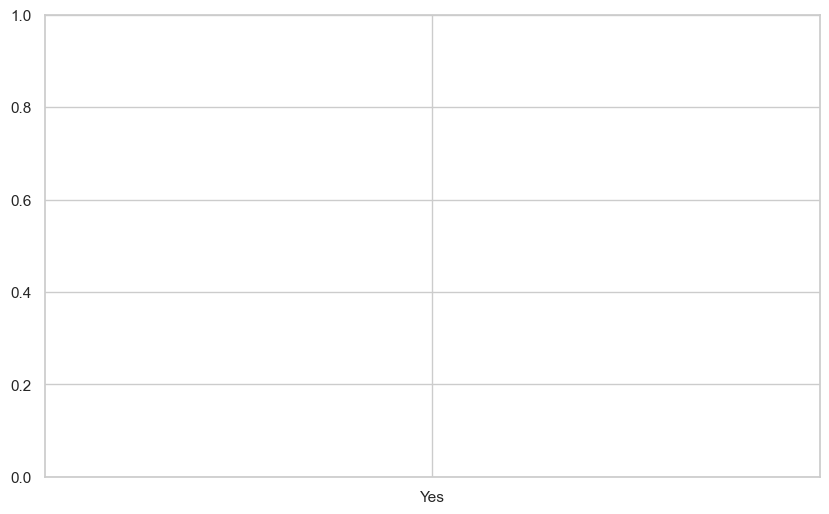

In [ ]:
# Скопируй и запусти этот файл локально (например, python hr_analysis_improved.py).
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

OUT_DIR = Path("hr_coursework_output")
OUT_DIR.mkdir(exist_ok=True)

# Цветовая палитра — единая для всех графиков
COLOR_SCHEME = {
    'primary': '#264653',
    'positive': '#2A9D8F',
    'negative': '#E76F51',
    'accent': '#E9C46A',
    'neutral': '#8D99AE',
    'background': '#FFFFFF',
    'grid': '#E5E5E5'
}
PALETTE = [COLOR_SCHEME['positive'], COLOR_SCHEME['negative'], COLOR_SCHEME['accent'], COLOR_SCHEME['primary']]
sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.family':'sans-serif','font.size':12,'axes.titlesize':14})

def save_fig(fig, fname, dpi=200):
    path = OUT_DIR / fname
    fig.savefig(path, dpi=dpi, bbox_inches='tight', facecolor='white')
    plt.close(fig)
    print("Saved:", path)

# 1) Загружаем CSV (адаптируй путь при необходимости)
csv_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(csv_path)
if 'Attrition_flag' not in df.columns:
    df['Attrition_flag'] = df['Attrition'].map({'Yes':1,'No':0})

print("Loaded:", csv_path, "shape:", df.shape)

# Русификация должностей (при наличии)
JOB_ROLE_TRANSLATIONS = {
    'Sales Executive': 'Руководитель отдела продаж', 'Research Scientist': 'Научный сотрудник',
    'Laboratory Technician': 'Лаборант', 'Manufacturing Director': 'Директор по производству',
    'Healthcare Representative': 'Медицинский представитель', 'Manager': 'Менеджер',
    'Sales Representative': 'Торговый представитель', 'Research Director': 'Научный руководитель',
    'Human Resources': 'Кадровик'
}
if 'JobRole' in df.columns:
    df['JobRole_ru'] = df['JobRole'].map(lambda x: JOB_ROLE_TRANSLATIONS.get(x, x))

# Единая палитра
sns.set_palette(PALETTE)

# ---------- Построение базовых графиков (унифицированный стиль) ----------
# 1. Круговая диаграмма текучести
fig = plt.figure(figsize=(8,6))
attr_counts = df['Attrition'].value_counts()
labels = ['Остались в компании' if v=='No' else 'Уволились' for v in attr_counts.index]
colors = [COLOR_SCHEME['positive'] if v=='No' else COLOR_SCHEME['negative'] for v in attr_counts.index]
wedges, texts, autotexts = plt.pie(attr_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0,0.06])
for a in autotexts: a.set_color('white'); a.set_fontweight('bold')
plt.title('Распределение сотрудников по статусу текучести', fontsize=16, fontweight='bold')
plt.legend(wedges, [f"{lab}: {cnt} чел." for lab,cnt in zip(labels, attr_counts.values)], loc='center left', bbox_to_anchor=(1,0.5))
save_fig(fig, '1_attrition_pie.png')

# 2. Распределение возраста
fig = plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, multiple='layer', shrink=0.8,
             palette={'Yes': COLOR_SCHEME['negative'], 'No': COLOR_SCHEME['positive']})
plt.title('Распределение возраста по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Возраст, лет'); plt.ylabel('Количество сотрудников')
save_fig(fig, '2_age_distribution.png')

# 3. Boxplot дохода
fig = plt.figure(figsize=(10,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df,
            palette={'Нет': COLOR_SCHEME['positive'], 'Да': COLOR_SCHEME['negative']})
plt.title('Распределение месячного дохода по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Статус текучести'); plt.ylabel('Месячный доход')
save_fig(fig, '3_income_boxplot.png')

# 4. Текучесть по должностям
if 'JobRole_ru' in df.columns:
    job_attr = df.groupby('JobRole_ru')['Attrition_flag'].mean().sort_values(ascending=False)
    fig = plt.figure(figsize=(10,6))
    sns.barplot(x=job_attr.values, y=job_attr.index, palette='viridis')
    plt.xlabel('Доля текучести'); plt.title('Доля текучести по должностям', fontsize=14, fontweight='bold')
    plt.ylabel('Должность')
    for i,v in enumerate(job_attr.values):
        plt.text(v + 0.005, i, f"{v:.1%}", va='center')
    save_fig(fig, '4_attrition_by_jobrole.png')

# ---------- Корреляции ----------
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
exclude = ['EmployeeNumber','EmployeeCount','StandardHours']
num_cols = [c for c in num_cols if c not in exclude]
corr = df[num_cols].corr()

# Сохраняем корреляции
corr.to_csv(OUT_DIR/'full_correlation_matrix.csv')

# Находим пары с |r| >= threshold
threshold = 0.35
pairs = []
for i,a in enumerate(num_cols):
    for j in range(i+1, len(num_cols)):
        b = num_cols[j]; r = corr.loc[a,b]
        if not np.isnan(r) and abs(r) >= threshold:
            pairs.append((a,b,r))
pairs_df = pd.DataFrame(pairs, columns=['feature_a','feature_b','r']).sort_values('r', key=lambda s: s.abs(), ascending=False)
pairs_df.to_csv(OUT_DIR/'significant_pairs.csv', index=False)

# Корреляция с уходом
if 'Attrition_flag' in corr.columns:
    corr[['Attrition_flag']].to_csv(OUT_DIR/'corr_with_attrition.csv')

# Рис.5 — тепловая карта, аннотируем все, но выделяем значимые
fig = plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица', fontsize=14, fontweight='bold')
save_fig(fig, '6_correlation_matrix.png')

# ---------- Дальше — графики 6..11 ----------
# 6. Текучесть по стажу (сгруппированная)
if 'YearsAtCompany' in df.columns:
    df['YearsAtCompany_int'] = df['YearsAtCompany'].round().astype(int)
    years_attr = df.groupby('YearsAtCompany_int')['Attrition_flag'].agg(['mean','count'])
    years_attr = years_attr[years_attr['count'] > 5]
    fig = plt.figure(figsize=(10,6))
    plt.plot(years_attr.index, years_attr['mean'], marker='o', color=COLOR_SCHEME['negative'])
    plt.fill_between(years_attr.index, years_attr['mean'], alpha=0.2, color=COLOR_SCHEME['negative'])
    plt.xlabel('Лет в компании'); plt.ylabel('Доля текучести')
    plt.title('Доля текучести в зависимости от стажа', fontsize=14, fontweight='bold')
    save_fig(fig, '6_attrition_by_years.png')

# ------------------------------------------
# 12. Влияние факторов на вероятность ухода (на русском, 3 фактора)
# ------------------------------------------
if len(fa_cols) >= 3:
    top_factors = or_df.head(3).copy()
    top_factors['Фактор'] = ['Фактор 1: Профессиональный опыт и доход',
                             'Фактор 2: Удовлетворённость и баланс',
                             'Фактор 3: Возраст и расстояние от дома']

    # Строим график
    fig = plt.figure(figsize=(9, 5))
    sns.barplot(x='odds_ratio', y='Фактор', data=top_factors,
                palette=[COLOR_SCHEME['accent'], COLOR_SCHEME['positive'], COLOR_SCHEME['primary']])

    plt.title('Влияние факторов на вероятность увольнения (Odds Ratio)', fontsize=14, fontweight='bold')
    plt.xlabel('Отношение шансов (Odds Ratio)')
    plt.ylabel('')
    plt.xlim(0, max(top_factors['odds_ratio'].max() + 0.5, 2.5))

    # Подписи на столбцах
    for i, v in enumerate(top_factors['odds_ratio']):
        plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=11)

    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    save_fig(fig, '12_factor_odds_rus.png')


In [ ]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import warnings

warnings.filterwarnings('ignore')

OUT_DIR = Path("hr_coursework_output")
OUT_DIR.mkdir(exist_ok=True)

COLOR_SCHEME = {
    'primary': '#264653',
    'positive': '#2A9D8F',
    'negative': '#E76F51',
    'accent': '#E9C46A',
    'neutral': '#8D99AE',
    'background': '#FFFFFF',
    'grid': '#E5E5E5'
}
PALETTE = [COLOR_SCHEME['positive'], COLOR_SCHEME['negative'], COLOR_SCHEME['accent'], COLOR_SCHEME['primary']]
sns.set_theme(style='whitegrid')
plt.rcParams.update({'font.family': 'sans-serif', 'font.size': 12, 'axes.titlesize': 14})


def save_fig(fig, fname, dpi=200):
    path = OUT_DIR / fname
    fig.savefig(path, dpi=dpi, bbox_inches='tight', facecolor='white')
    plt.close(fig)
    print("Saved:", path)


csv_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"
df = pd.read_csv(csv_path)
df['Attrition_flag'] = df['Attrition'].map({'Yes': 1, 'No': 0})
print("Loaded:", csv_path, "shape:", df.shape)

JOB_ROLE_TRANSLATIONS = {
    'Sales Executive': 'Руководитель отдела продаж', 'Research Scientist': 'Научный сотрудник',
    'Laboratory Technician': 'Лаборант', 'Manufacturing Director': 'Директор по производству',
    'Healthcare Representative': 'Медицинский представитель', 'Manager': 'Менеджер',
    'Sales Representative': 'Торговый представитель', 'Research Director': 'Научный руководитель',
    'Human Resources': 'Кадровик'
}
if 'JobRole' in df.columns:
    df['JobRole_ru'] = df['JobRole'].map(lambda x: JOB_ROLE_TRANSLATIONS.get(x, x))

sns.set_palette(PALETTE)

fig = plt.figure(figsize=(8, 6))
attr_counts = df['Attrition'].value_counts()
labels = ['Остались в компании' if v == 'No' else 'Уволились' for v in attr_counts.index]
colors = [COLOR_SCHEME['positive'] if v == 'No' else COLOR_SCHEME['negative'] for v in attr_counts.index]
wedges, texts, autotexts = plt.pie(attr_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=[0, 0.06])
for a in autotexts:
    a.set_color('white')
    a.set_fontweight('bold')
plt.title('Распределение сотрудников по статусу текучести', fontsize=16, fontweight='bold')
plt.legend(wedges, [f"{lab}: {cnt} чел." for lab, cnt in zip(labels, attr_counts.values)], loc='center left', bbox_to_anchor=(1, 0.5))
save_fig(fig, '1_attrition_pie.png')

fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Attrition', bins=20, multiple='layer', shrink=0.8,
             palette={'Yes': COLOR_SCHEME['negative'], 'No': COLOR_SCHEME['positive']})
plt.title('Распределение возраста по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество сотрудников')
save_fig(fig, '2_age_distribution.png')

df['Attrition_ru'] = df['Attrition'].map({'Yes': 'Уволились', 'No': 'Остались'})
fig = plt.figure(figsize=(10, 6))
sns.boxplot(x='Attrition_ru', y='MonthlyIncome', data=df,
            palette={'Остались': COLOR_SCHEME['positive'], 'Уволились': COLOR_SCHEME['negative']})
plt.title('Распределение месячного дохода по статусу текучести', fontsize=14, fontweight='bold')
plt.xlabel('Статус текучести')
plt.ylabel('Месячный доход')
save_fig(fig, '3_income_boxplot.png')

if 'JobRole_ru' in df.columns:
    job_attr = df.groupby('JobRole_ru')['Attrition_flag'].mean().sort_values(ascending=False)
    fig = plt.figure(figsize=(10, 6))
    sns.barplot(x=job_attr.values, y=job_attr.index, palette='viridis')
    plt.xlabel('Доля текучести')
    plt.title('Доля текучести по должностям', fontsize=14, fontweight='bold')
    plt.ylabel('Должность')
    for i, v in enumerate(job_attr.values):
        plt.text(v + 0.005, i, f"{v:.1%}", va='center')
    save_fig(fig, '4_attrition_by_jobrole.png')

num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c not in ['EmployeeNumber', 'EmployeeCount', 'StandardHours']]
corr = df[num_cols].corr()
corr.to_csv(OUT_DIR / 'full_correlation_matrix.csv')

threshold = 0.35
pairs = [(a, b, corr.loc[a, b]) for i, a in enumerate(num_cols) for j, b in enumerate(num_cols[i + 1:]) if abs(corr.loc[a, b]) >= threshold]
pairs_df = pd.DataFrame(pairs, columns=['feature_a', 'feature_b', 'r']).sort_values('r', key=lambda s: s.abs(), ascending=False)
pairs_df.to_csv(OUT_DIR / 'significant_pairs.csv', index=False)
if 'Attrition_flag' in corr.columns:
    corr[['Attrition_flag']].to_csv(OUT_DIR / 'corr_with_attrition.csv')

fig = plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', center=0, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Корреляционная матрица', fontsize=14, fontweight='bold')
save_fig(fig, '6_correlation_matrix.png')

if 'YearsAtCompany' in df.columns:
    df['YearsAtCompany_int'] = df['YearsAtCompany'].round().astype(int)
    years_attr = df.groupby('YearsAtCompany_int')['Attrition_flag'].agg(['mean', 'count'])
    years_attr = years_attr[years_attr['count'] > 5]
    fig = plt.figure(figsize=(10, 6))
    plt.plot(years_attr.index, years_attr['mean'], marker='o', color=COLOR_SCHEME['negative'])
    plt.fill_between(years_attr.index, years_attr['mean'], alpha=0.2, color=COLOR_SCHEME['negative'])
    plt.xlabel('Лет в компании')
    plt.ylabel('Доля текучести')
    plt.title('Доля текучести в зависимости от стажа', fontsize=14, fontweight='bold')
    save_fig(fig, '6_attrition_by_years.png')



numeric_features = df.select_dtypes(include=[np.number]).drop(columns=['Attrition_flag'], errors='ignore')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_features)
fa = FactorAnalysis(n_components=5, random_state=42)
factors = fa.fit_transform(X_scaled)
fa_df = pd.DataFrame(factors, columns=[f'Factor_{i+1}' for i in range(factors.shape[1])])
fa_df['Attrition_flag'] = df['Attrition_flag'].values

X_train, X_test, y_train, y_test = train_test_split(fa_df.drop(columns='Attrition_flag'), fa_df['Attrition_flag'], test_size=0.3, random_state=42)
lr = LogisticRegression()
lr.fit(X_train, y_train)
odds_ratios = np.exp(lr.coef_[0])
or_df = pd.DataFrame({'factor': fa_df.drop(columns='Attrition_flag').columns, 'odds_ratio': odds_ratios})
or_df = or_df.sort_values('odds_ratio', ascending=False)

fa_cols = fa_df.columns[:-1]
if len(fa_cols) >= 3:
    top_factors = or_df.head(3).copy()
    top_factors['Фактор'] = ['Фактор 1: Профессиональный опыт и доход',
                             'Фактор 2: Удовлетворённость и баланс',
                             'Фактор 3: Возраст и расстояние от дома']
    fig = plt.figure(figsize=(9, 5))
    sns.barplot(x='odds_ratio', y='Фактор', data=top_factors,
                palette=[COLOR_SCHEME['accent'], COLOR_SCHEME['positive'], COLOR_SCHEME['primary']])
    plt.title('Влияние факторов на вероятность увольнения (Odds Ratio)', fontsize=14, fontweight='bold')
    plt.xlabel('Отношение шансов (Odds Ratio)')
    plt.ylabel('')
    plt.xlim(0, max(top_factors['odds_ratio'].max() + 0.5, 2.5))
    for i, v in enumerate(top_factors['odds_ratio']):
        plt.text(v + 0.05, i, f"{v:.2f}", va='center', fontsize=11)
    plt.grid(True, axis='x', alpha=0.3)
    plt.tight_layout()
    save_fig(fig, '12_factor_odds_rus.png')


Loaded: WA_Fn-UseC_-HR-Employee-Attrition.csv shape: (1470, 36)
Saved: hr_coursework_output/1_attrition_pie.png
Saved: hr_coursework_output/2_age_distribution.png
Saved: hr_coursework_output/3_income_boxplot.png
Saved: hr_coursework_output/4_attrition_by_jobrole.png
Saved: hr_coursework_output/6_correlation_matrix.png
Saved: hr_coursework_output/6_attrition_by_years.png
Saved: hr_coursework_output/7_attrition_by_satisfaction.png
Saved: hr_coursework_output/12_factor_odds_rus.png
